In [33]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import datetime

In [3]:
data = pd.read_excel('online_retail.xlsx', sheet_name = ['Year 2009-2010', 'Year 2010-2011'])

In [4]:
df1 = data['Year 2009-2010']
df2 = data['Year 2010-2011']

In [5]:
df1.shape, df2.shape  #checking for the shape of data

((525461, 8), (541910, 8))

In [6]:
data_combine = pd.concat([df1, df2], ignore_index = True)

data_combine.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [7]:
data_combine.shape

(1067371, 8)

In [8]:
data_combine.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
data_combine.dropna(axis = 0, subset = ['Description'], inplace= True)

In [10]:
data_combine.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [11]:
data_combine[data_combine['Customer ID'].isnull()]

Invoice StockCode                     Description  Quantity  \
263      489464     21733                    85123a mixed       -96   
283      489463     71477                           short      -240   
284      489467    85123A                     21733 mixed      -192   
577      489525    85226C       BLUE PULL BACK RACING CAR         1   
578      489525     85227     SET/6 3D KIT CARDS FOR KIDS         1   
...         ...       ...                             ...       ...   
1066997  581498    85099B         JUMBO BAG RED RETROSPOT         5   
1066998  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
1066999  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
1067000  581498     85174               S/4 CACTI CANDLES         1   
1067001  581498       DOT                  DOTCOM POSTAGE         1   

                InvoiceDate    Price  Customer ID         Country  
263     2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283     2009-12-01 10:52:00     0.00          NaN  United Kingdom  
284     2009-12-01 10:53:00     0.00          NaN  United Kingdom  
577     2009-12-01 11:49:00     0.55          NaN  United Kingdom  
578     2009-12-01 11:49:00     0.85          NaN  United Kingdom  
...                     ...      ...          ...             ...  
1066997 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
1066998 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
1066999 2011-12-09 10:26:00     4.96          NaN  United Kingdom  
1067000 2011-12-09 10:26:00    10.79          NaN  United Kingdom  
1067001 2011-12-09 10:26:00  1714.17          NaN  United Kingdom  

[238625 rows x 8 columns]

In [12]:
#We need to drop the rows where the customer ID is null, as it's a unique identifier for each customer. 
#Imputing it with a random value wouldn’t be appropriate, so dropping these rows is the better option.

In [13]:
data_combine.dropna(axis = 0, subset = ['Customer ID'], inplace = True)

In [15]:
data_combine.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [16]:
temp_df = pd.DataFrame(data_combine['Country'].value_counts())  #creating temporary dataframe

In [17]:
temp_df.head(10)

Country
United Kingdom   741301
Germany           17624
EIRE              16195
France            14202
Netherlands        5140
Spain              3811
Belgium            3123
Switzerland        3064
Portugal           2504
Australia          1913

In [20]:
names = temp_df.index

## As you can see the United Kingdom has the max transcations as compared to other countries. The one here to note is that the "United Kingdom" is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

In [27]:
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
px.scatter(data_combine.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

### From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [34]:
countries = data_combine['Country'].unique()  #extracting unique country names

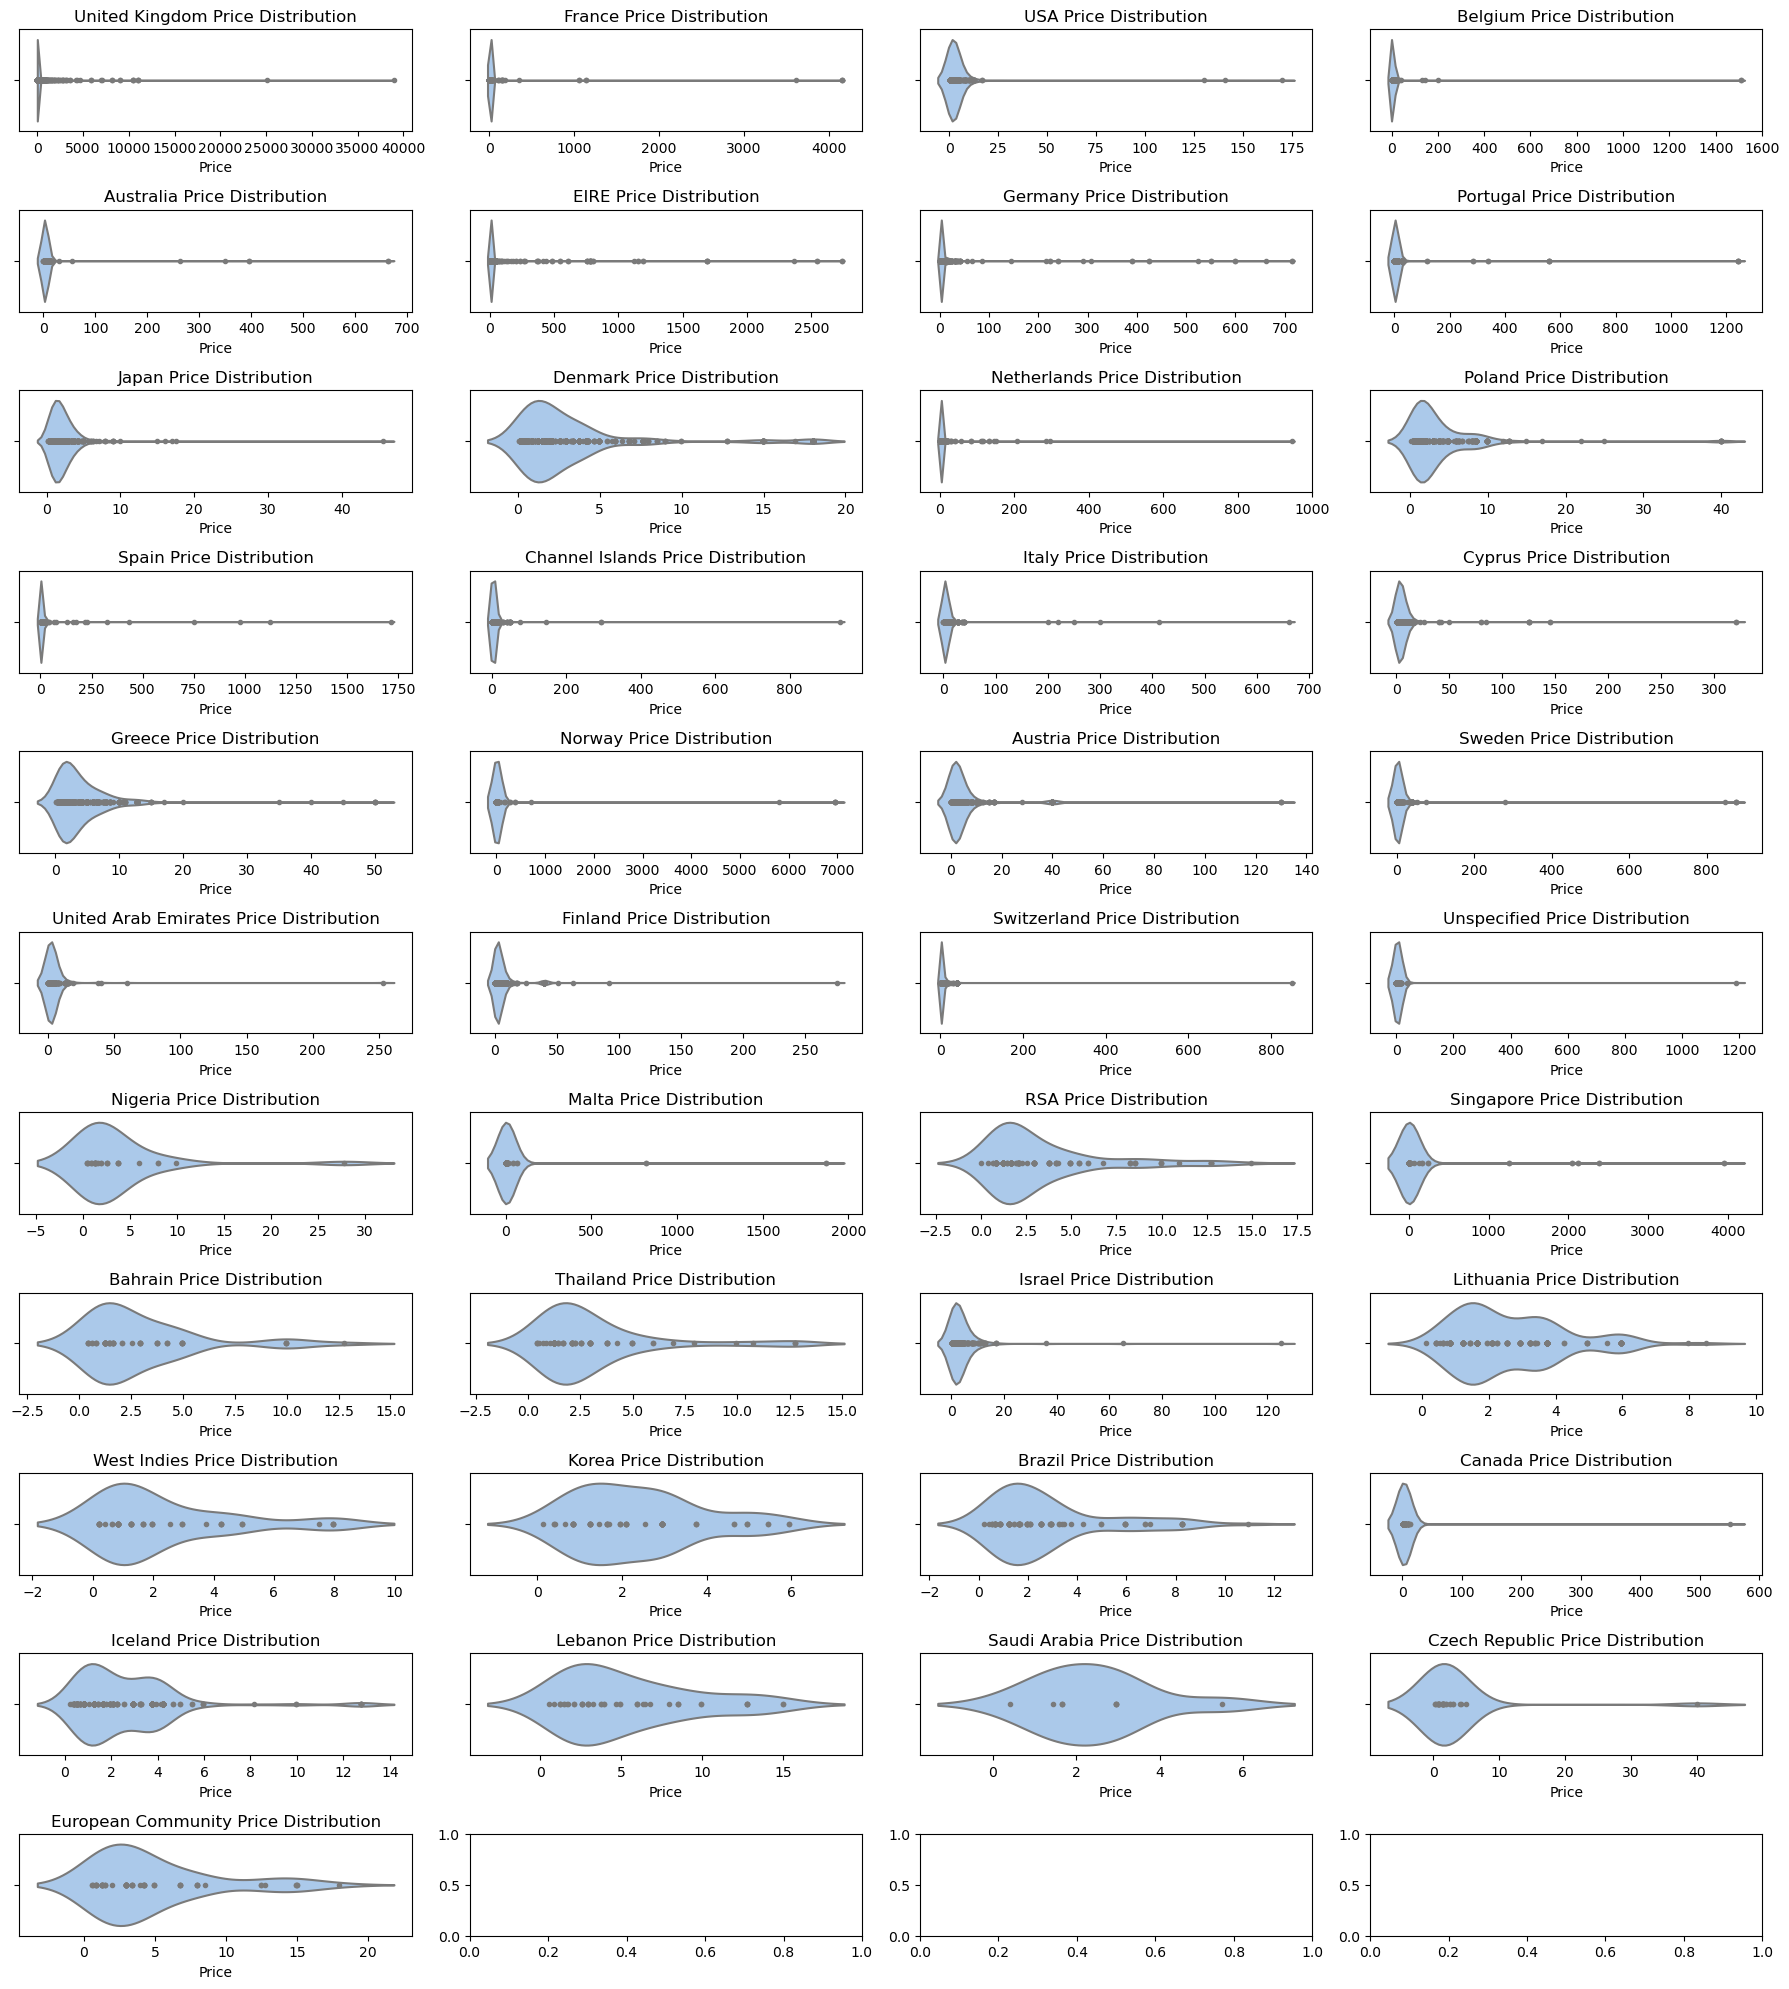

In [37]:
#ploting violin plot

fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data_combine[data_combine["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

## From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [40]:
# total number of unique invoices

len(data_combine['Invoice'].unique())

44876

In [44]:
temp_invoices_df = data_combine.groupby('Invoice').sum()

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\3219518820.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [46]:
temp_invoices_df.reset_index(inplace = True)

In [48]:
temp_invoices_df.sort_values(by = 'Quantity', ascending = False).head(30).iloc[:,:2]

Invoice  Quantity
11080  518505     87167
13425  524174     87167
3064   497946     83774
36942  581483     80995
20348  541431     74215
4379   501534     63974
2096   495194     63302
4693   502269     40000
1604   493819     25018
1047   491812     20524
7529   509472     17766
246    490018     17520
16097  530715     15696
26551  556917     15049
29051  563076     14730
32810  572035     13392
12179  521315     13008
14557  526761     12954
2252   495591     12832
30858  567423     12572
35799  578841     12540
7239   508748     12500
24876  552883     12266
29282  563614     12196
18296  536009     12048
11136  518673     11904
28783  562439     11848
22980  548011     11116
21933  545475     10272
17933  535104     10014

In [50]:
# top 15 invoices with average prices sorted from high to low

data_combine.groupby(['Invoice']).mean().head(15).iloc[:, [1]].sort_values('Price', ascending = False)

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\770022064.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Price
Invoice            
489444   141.000000
489447   130.000000
489434     4.081250
489436     3.730526
489437     3.628261
489439     3.560000
489440     3.150000
489446     3.118519
489441     3.042500
489448     2.970000
489435     2.625000
489438     2.591176
489445     2.477895
489443     2.370000
489442     2.040870

## I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 489444 & 489447 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [51]:
data_combine[(data_combine['Invoice'] == 489444) | (data_combine['Invoice'] == 489447)]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
126  489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.0   
173  489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.0   

     Customer ID  Country  
126      12636.0      USA  
173      12362.0  Belgium

## As you can see above, These 2 invoices with invoice number 489444 and 489447 had only single transaction, that's why the average price was too high.

# INITIAL EDA INSIGHTS:

Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

There are total 44876 uniques purchased happend so far.

We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

In [53]:
#Let's look at the data once again & see what else insights we can get from the data itself
data_combine.head(15)

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   
14  489436     21754             HOME BUILDING BLOCK WORD         3   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7  2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8  2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9  2009-12-01 07:46:00   3.75      13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65      13085.0  United Kingdom  
11 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
13 2009-12-01 09:06:00   5.45      13078.0  United Kingdom  
14 2009-12-01 09:06:00   5.95      13078.0  United Kingdom

# Exploratory Data Analysis Continued.....

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\2018609946.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Description'>

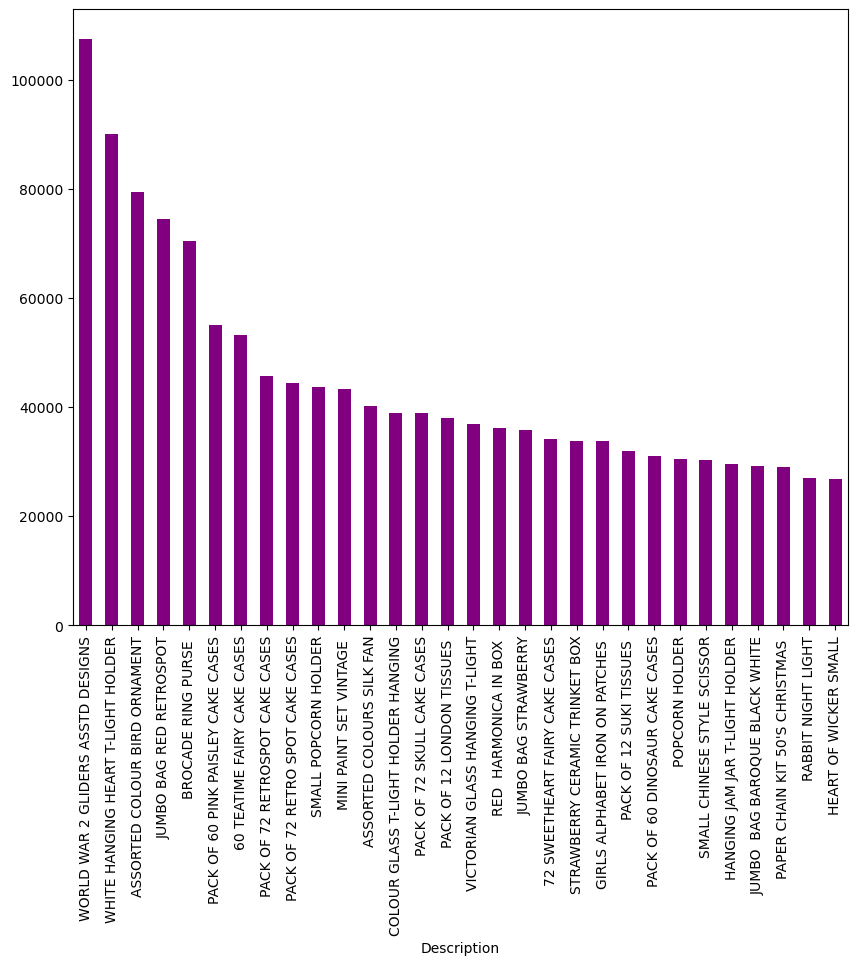

In [56]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data_combine.groupby('Description').sum().sort_values(by = 'Quantity', ascending = False).head(30)['Quantity'].plot(kind = 'bar', color = 'purple')

In [63]:
temp_data = data_combine.copy() #creating a data copy point

In [64]:
temp_data #use the temp data for adding some extra columns to the data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                     ...    ...          ...             ...  
1067366 2011-12-09 12:50:00   2.10      12680.0          France  
1067367 2011-12-09 12:50:00   4.15      12680.0          France  
1067368 2011-12-09 12:50:00   4.15      12680.0          France  
1067369 2011-12-09 12:50:00   4.95      12680.0          France  
1067370 2011-12-09 12:50:00  18.00      12680.0          France  

[824364 rows x 8 columns]

In [65]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data_combine.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data_combine.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data_combine.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data_combine.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data_combine.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data_combine.InvoiceDate.dt.dayofweek

In [68]:
#mapping Day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [69]:
#renaming the data values using map function

temp_data['Day of Week'] = temp_data['Day of Week'].map(dayofweek_mapping)
temp_data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Month  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom     12   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom     12   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom     12   
...                     ...    ...          ...             ...    ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France     12   
1067367 2011-12-09 12:50:00   4.15      12680.0          France     12   
1067368 2011-12-09 12:50:00   4.15      12680.0          France     12   
1067369 2011-12-09 12:50:00   4.95      12680.0          France     12   
1067370 2011-12-09 12:50:00  18.00      12680.0          France     12   

             Time  Year  Day  Quarter Day of Week  
0        07:45:00  2009    1        4     Tuesday  
1        07:45:00  2009    1        4     Tuesday  
2        07:45:00  2009    1        4     Tuesday  
3        07:45:00  2009    1        4     Tuesday  
4        07:45:00  2009    1        4     Tuesday  
...           ...   ...  ...      ...         ...  
1067366  12:50:00  2011    9        4      Friday  
1067367  12:50:00  2011    9        4      Friday  
1067368  12:50:00  2011    9        4      Friday  
1067369  12:50:00  2011    9        4      Friday  
1067370  12:50:00  2011    9        4      Friday  

[824364 rows x 14 columns]

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\2355806820.py:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\2355806820.py:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\2355806820.py:20: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



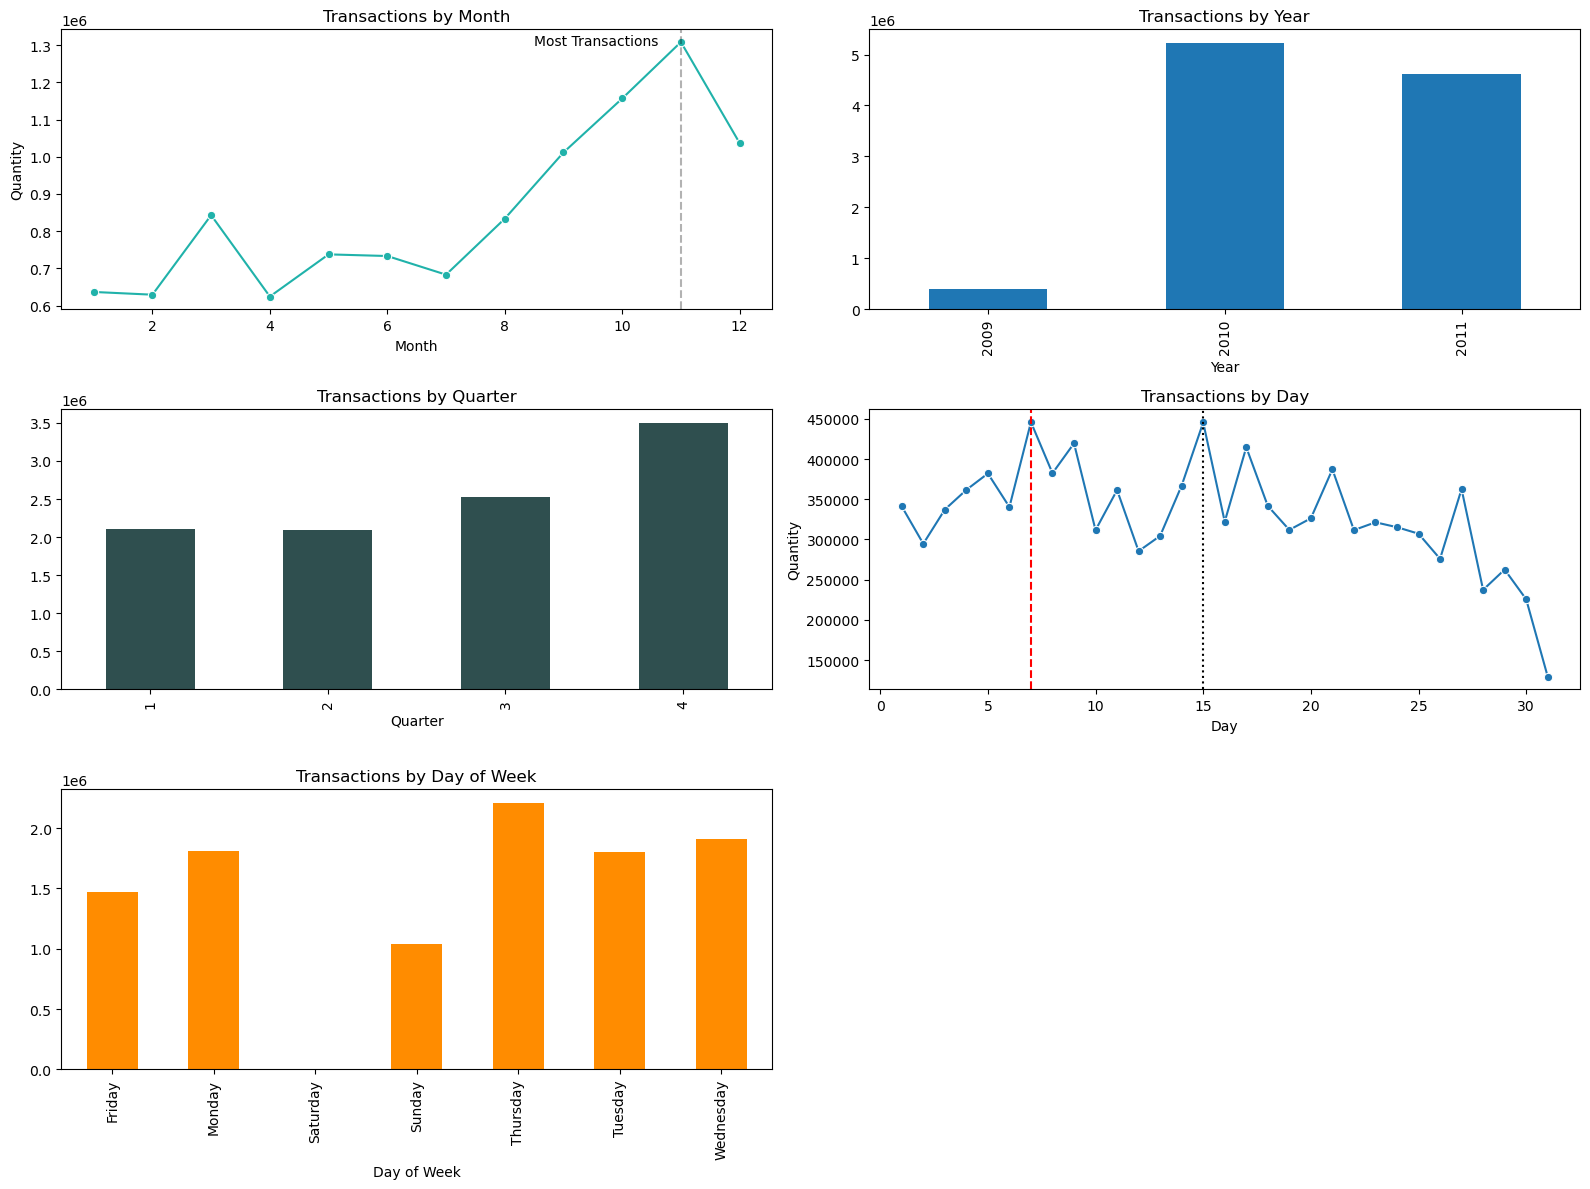

In [70]:
#Plotting the above data
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

##  As we can see, in 2009 the transactions is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 years.



In [72]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2010: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2010: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2011: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2011: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2010: 37
Total Number of Transactions in 2010: 5233315
--------------------------------------------
Total Number of Countries in 2011: 36
Total Number of Transactions in 2011: 4610527


## Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.



In [73]:
_2009 = temp_data[temp_data['Year'] == 2009]['Country'].unique()
_2010 = temp_data[temp_data['Year'] == 2010]['Country'].unique()
_2011 = temp_data[temp_data['Year'] == 2011]['Country'].unique()

In [74]:
#checking for the countries which are available in  2010 and 2011 but not in 2009.

no_cols = []
for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [76]:
temp = data_combine.groupby(["Country", "Description"]).sum()["Quantity"]

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\2932353635.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [77]:
temp = pd.DataFrame(temp)

# Top 8 Countries With Popular Products


In [78]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

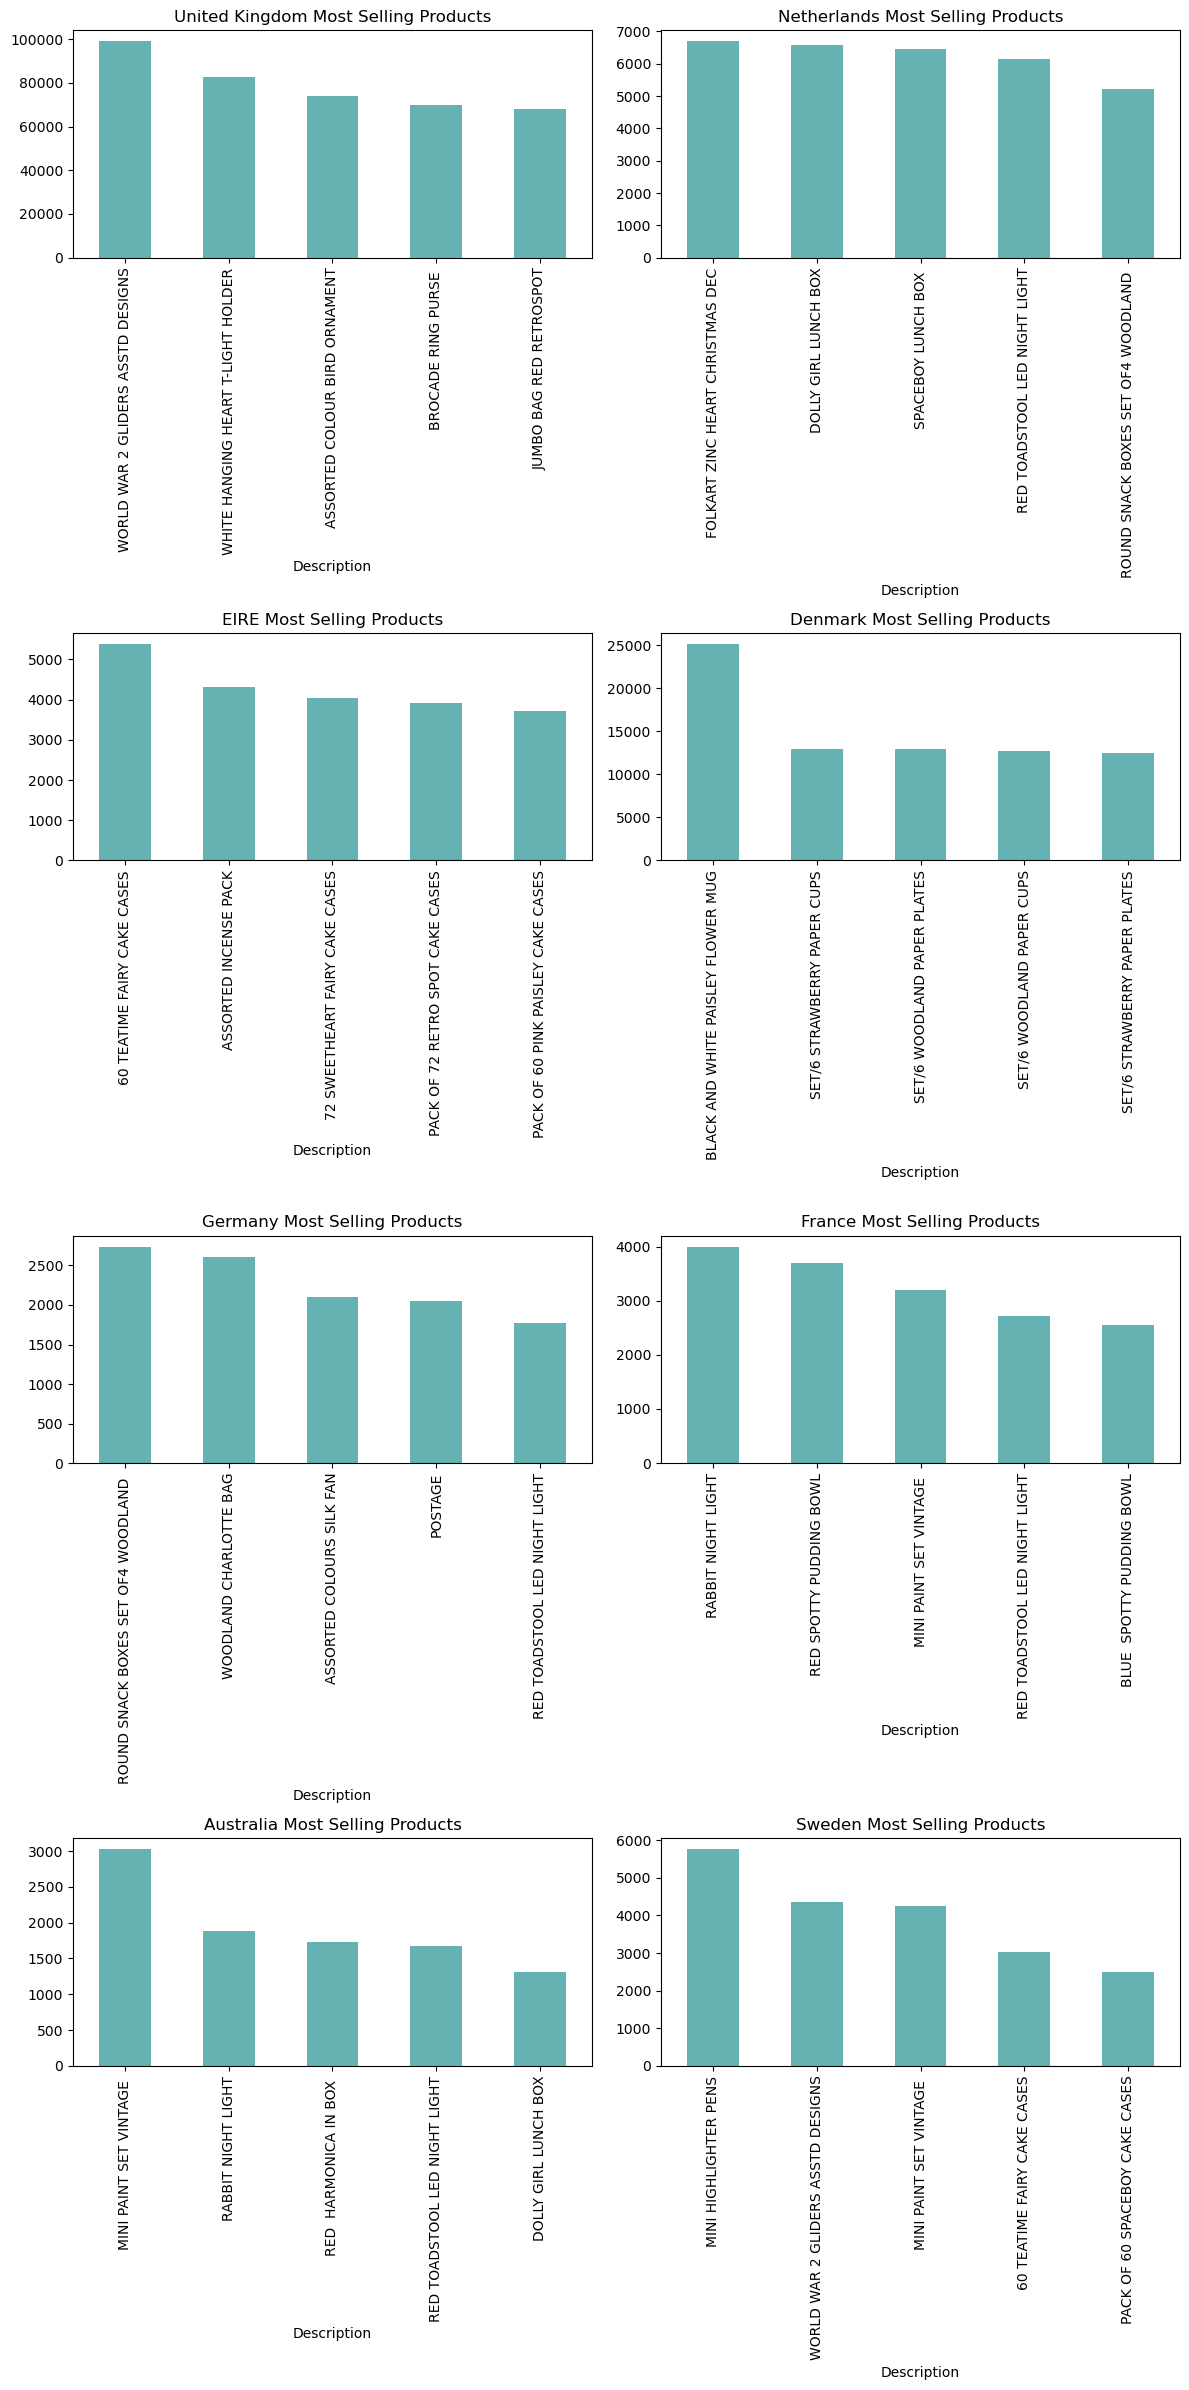

In [79]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

# Bottom 8 Countries with Mostly Purchased Products

In [80]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

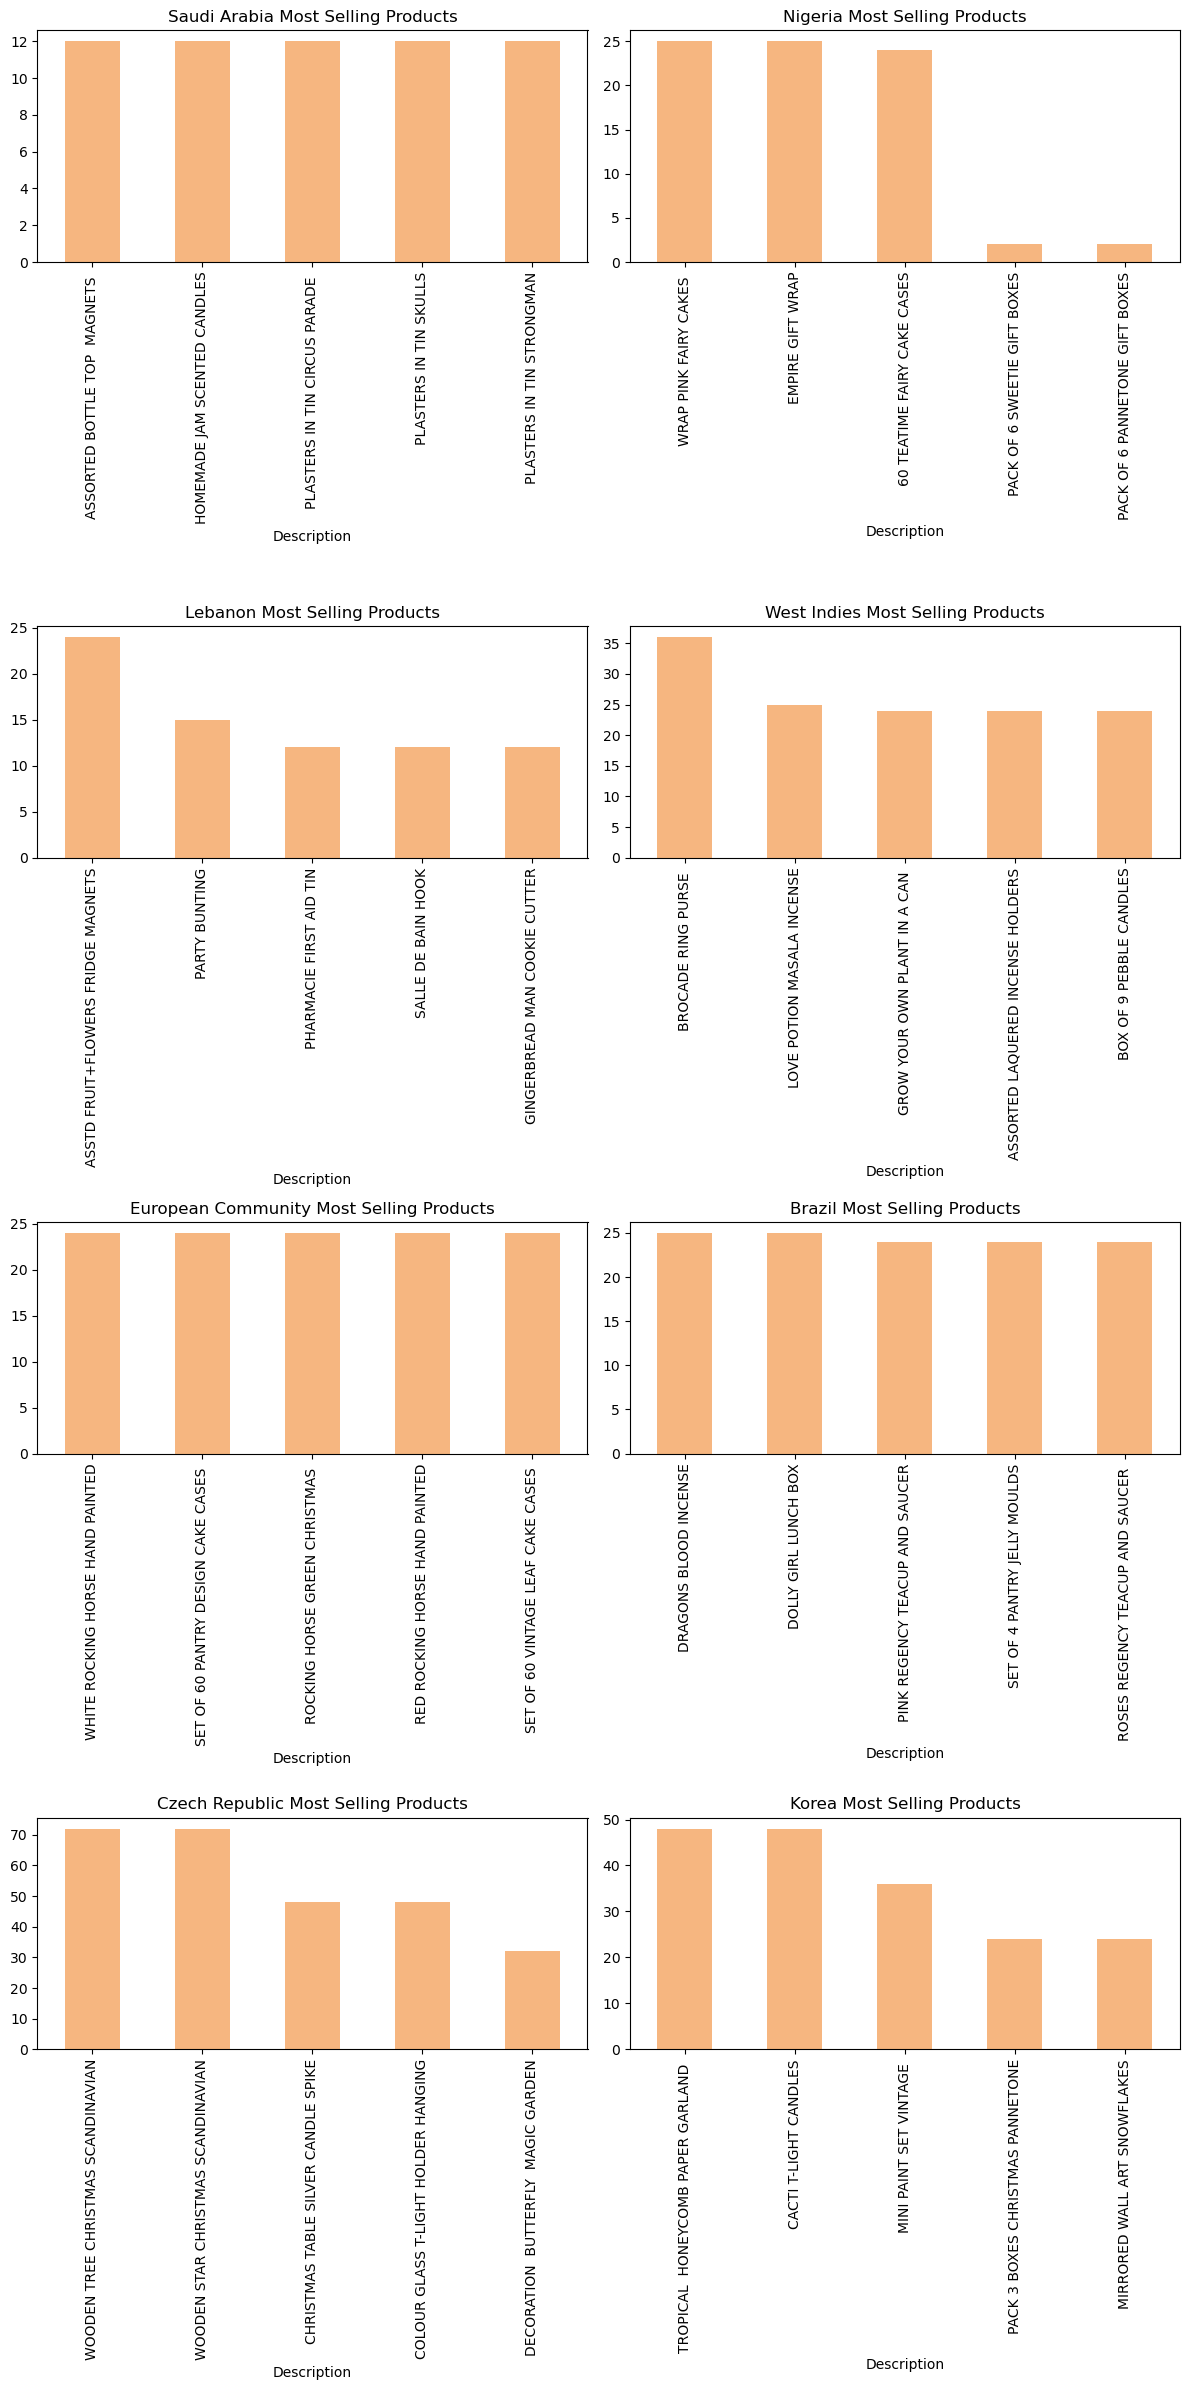

In [81]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

# EDA INSIGHTS:
Our Top 5 Best Selling Products are World War 2 Gliders, White Hanging Heart, Assorted Colour Bird, Jumbo Bag Red, Brocade Ring.

Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

2010 is the year in which we have the most transactions followed by the 2011

Q4 being the highest when it comes transactions.

It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

People loves to shop on Thursday followed by Tuesday and Wednesday.

## RFM Estimation - (Recency, Frequency, Monetary)
RFM stands for frequency, recency & monetary is a marketing technique which is used to find the best customers by analyzing their past purchasing behavior. It includes how frequently they have purchased, what is the total amount that they have spend so far, what was the last time they have purchased from our online store so on & so forth.....

In [82]:
data_combine.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [86]:
data_combine["Total Amount"] = data_combine["Quantity"]*data_combine["Price"]

In [88]:
import lifetimes
from lifetimes.utils import summary_data_from_transaction_data

In [91]:
#calculating the recency, frequency, T, monetary_value
summary = lifetimes.utils.summary_data_from_transaction_data(data_combine, "Customer ID", "InvoiceDate", "Total Amount")

In [92]:
summary = summary.reset_index() #resetting the index

In [93]:
summary.shape


(5942, 5)

### A) T - T is the length of the period of observation for the customer based on the value used for freq (the default is frequency is day). This can also be thought of the length of time between a customer’s first purchase and the end of the period, measured in increments defined by freq.

### B) Recency - Recency is the point (relative to their own period of observation) at which the customer made their most recent repeat purchase. This can also be thought of the length of time between a customer’s first and last purchase for the period, measured in increments defined by freq.

### C) Frequency - Frequency is the number of repeat purchases the customer made during the observation period.

### D) Monetary - monetary_value is the average monetary amount of each repeat purchase made by a customer.

In [94]:
summary.head()

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571
2      12348.0        4.0    363.0  438.0      449.310000
3      12349.0        4.0    717.0  735.0     1107.172500
4      12350.0        0.0      0.0  310.0        0.000000

C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\260041036.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\260041036.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\260041036.py:10: UserWarning:



`distplot

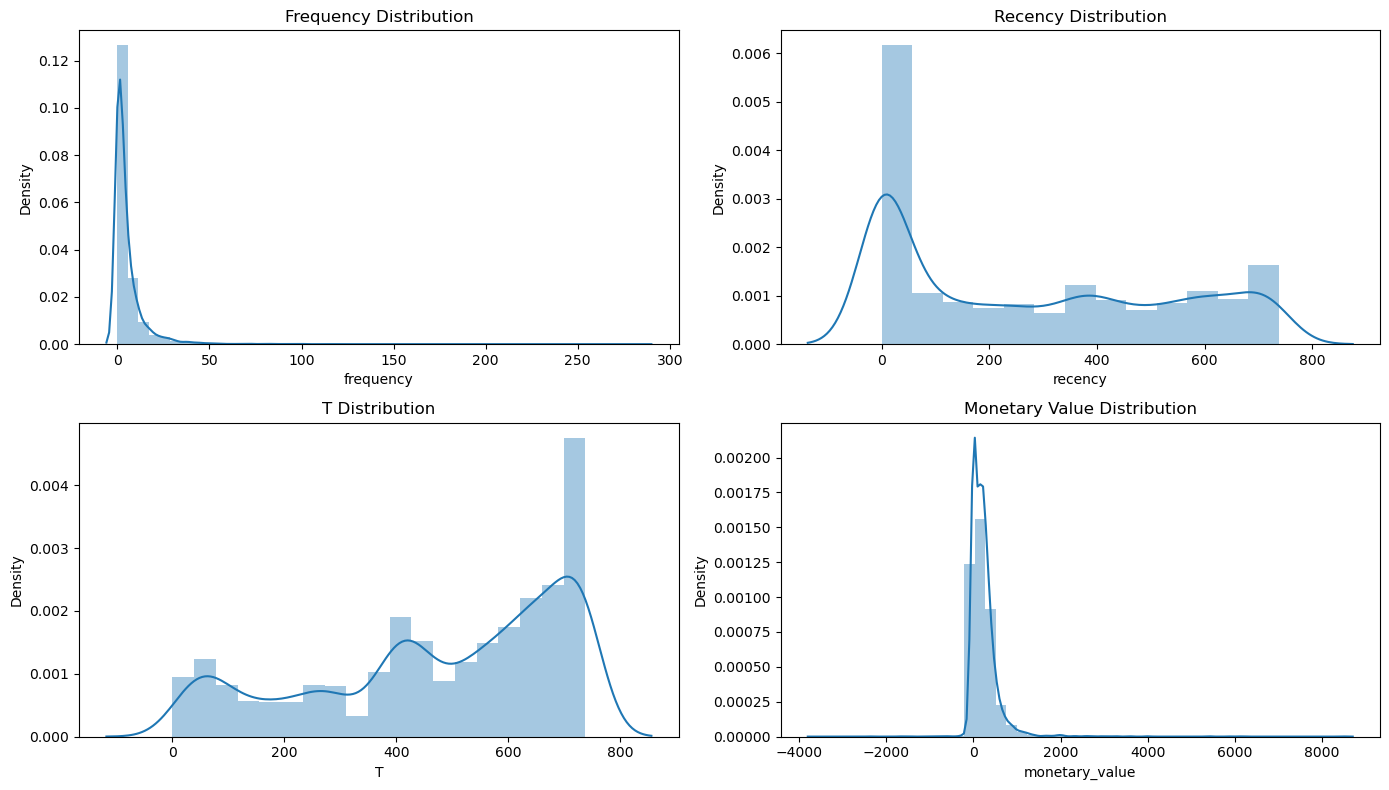

In [95]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

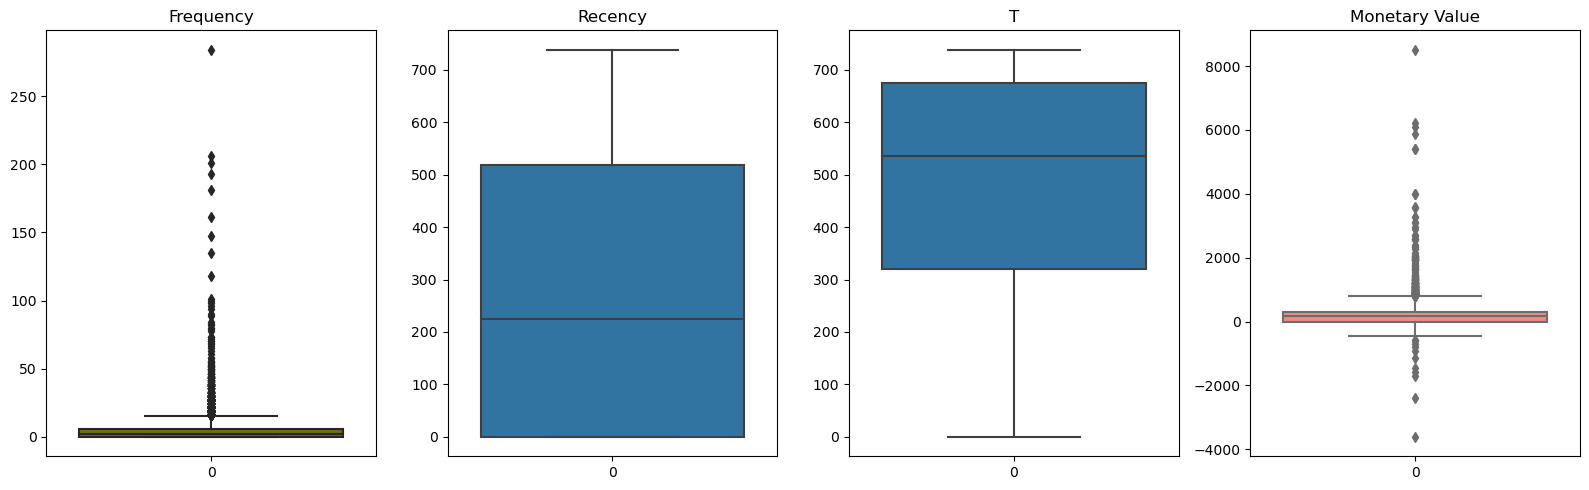

In [96]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [97]:
summary.describe()

Customer ID    frequency      recency            T  monetary_value
count   5942.000000  5942.000000  5942.000000  5942.000000     5942.000000
mean   15316.500000     5.479636   275.772299   478.229384      228.814496
std     1715.451981    11.293673   259.830840   223.879537      363.067124
min    12346.000000     0.000000     0.000000     0.000000    -3610.500000
25%    13831.250000     0.000000     0.000000   320.500000        0.000000
50%    15316.500000     2.000000   225.000000   536.000000      174.900625
75%    16801.750000     6.000000   518.000000   674.000000      314.594375
max    18287.000000   284.000000   738.000000   738.000000     8513.271143

In [98]:
#checking for the values containing zero.

print("Total Number of Frequency with 0: %s" % (len(summary[summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(summary[summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(summary[summary["monetary_value"] == 0])))

Total Number of Frequency with 0: 1544
Total Number of Recency with 0: 1544
Total Number of Monetary Value with 0: 1547


## Now we have the data related to the RFM, we can now start with which model we can build to predict our customer's lifetime value. First we have to figure out either we have to do the prediction based on the customer level or the aggregate level.

### For this analysis I am using to predict the customer lifetime value on the customer level rather than the aggregate or a cohort level

### Before building the model, we have to understand few of the most important things. We have to understand the business context that is the type of customers (contractual or non-contractual) and their purchase opportunity (discrete or continuous). The combination of both defines the business context which going to affect our CLV estimation approach.

## Basic Terms:

#### a) Contractual Customers - Contractual customers are subscription based customers. They churned on a defined date if they choose not to renew the subscription.

#### b) Non-Contractual Customers - Non Contractual customers generally exist in e-commerce or retail business where there's no defined time period when the customer is going to churn.

#### c) Continuous Purchase - It refers to the time period when the customer purchase a certain thing in any time period. Ex- Retail & E-commerce.

#### d) Discrete Purchase - It refers to the time period when the customer purchase a certain thing on a specific time period. Ex - Netflix, Hulu, Hotstar Subscription.

### For this analysis we are going to use the non-contractual with continuous purchase opportunity and the best fitted models we are going to use will be BG-NBD Model, Pareto-NBD Model, Modifies BG Model along with Gamma Gamma Distribution model for estimating the expected monetary value as a part of the customer lifetime value prediction.

# Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model


In [99]:
summary_bgf = summary.copy()

In [100]:
summary_bgf.head(2)

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571

In [103]:
from lifetimes import BetaGeoFitter


bgf = BetaGeoFitter(penalizer_coef = 0.0)

# We can use penalizer of 0.001 or 0.1 which we will be going to use later on based on the model performance and model selection

In [104]:
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>

In [105]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.668170  0.015453         0.637882         0.698458
alpha  49.943472  1.517728        46.968725        52.918220
a       0.145498  0.014512         0.117055         0.173941
b       2.112726  0.313787         1.497704         2.727749

In [106]:
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>


C:\Users\Suchita\anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:256: RuntimeWarning:

overflow encountered in double_scalars



<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

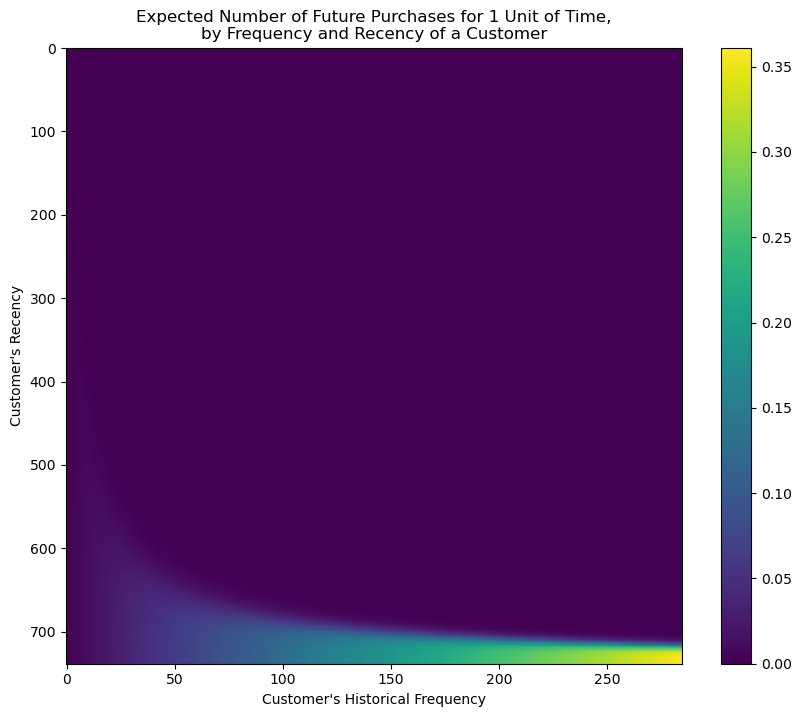

In [108]:
#plotting the frequency and recency matrix

from lifetimes.plotting import plot_frequency_recency_matrix


plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

### As you can see our best customers is where frequency is 250 and recency is 700+.

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

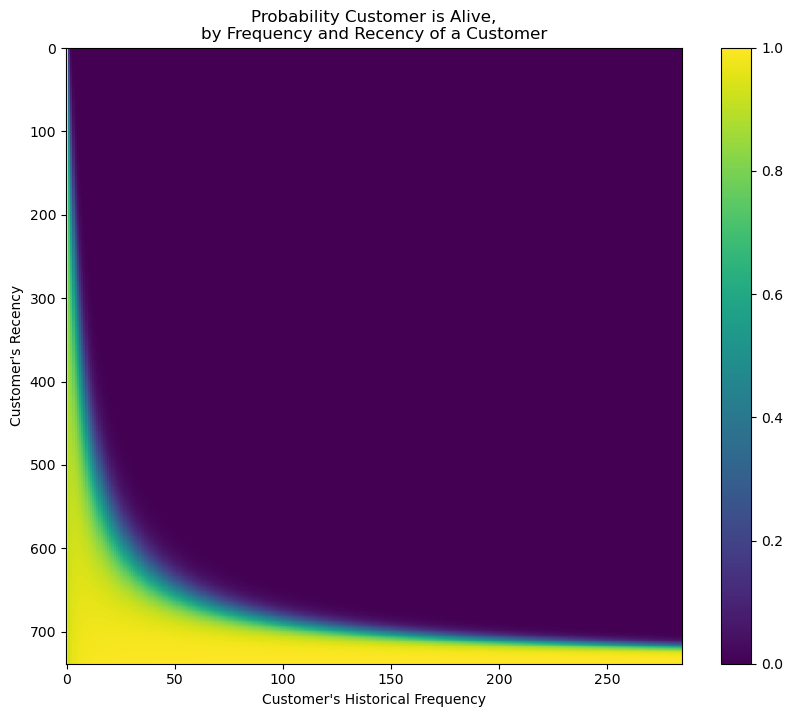

In [110]:
#plotting the churn matrix

from lifetimes.plotting import plot_probability_alive_matrix


plt.figure(figsize=(10,8))
plot_probability_alive_matrix(bgf)

### As you can see our 80% customers have already churn or we can say dropped.

In [111]:
t = 30
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

In [112]:
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  \
2260      14606.0      181.0    735.0  736.0      165.079448   
5495      17841.0      193.0    736.0  737.0      357.437461   
2965      15311.0      201.0    738.0  738.0      560.647015   
402       12748.0      206.0    735.0  735.0      241.501117   
2565      14911.0      284.0    737.0  738.0      948.996127   

      predicted_purchases  
2260             6.908522  
5495             7.355876  
2965             7.651860  
402              7.871598  
2565            10.800953

### Based on the above analysis, above are the top customers who are likely to purchase in the next day.

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

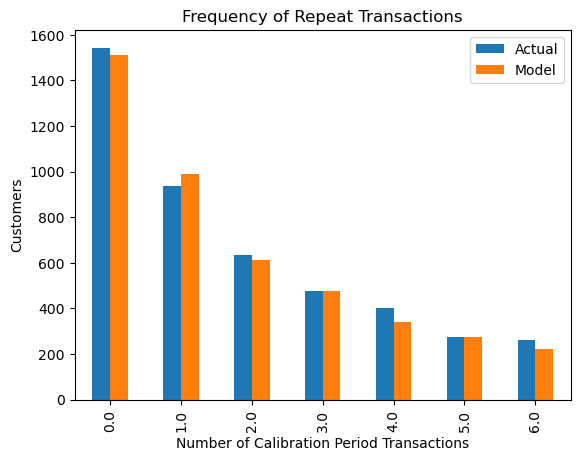

In [114]:
from lifetimes.plotting import plot_period_transactions


plot_period_transactions(bgf)

### We can see that our model is doing fair job. Our model is predicting fairly good at the 0 & 2 calibration time period.

In [117]:
#dividing our dataset into training & holdout

from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(data_combine, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [118]:
pd.DataFrame(summary_cal_holdout.head())

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [119]:
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 5025 subjects, a: 0.22, alpha: 49.70, b: 2.72, r: 0.67>

In [120]:
summary_cal_holdout

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   
...                    ...          ...    ...                ...   
18283.0                9.0        458.0  474.0                9.0   
18284.0                1.0          2.0  247.0                0.0   
18285.0                0.0          0.0  476.0                0.0   
18286.0                2.0        247.0  539.0                0.0   
18287.0                4.0        537.0  554.0                2.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0  
...                       ...  
18283.0                 184.0  
18284.0                 184.0  
18285.0                 184.0  
18286.0                 184.0  
18287.0                 184.0  

[5025 rows x 5 columns]

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

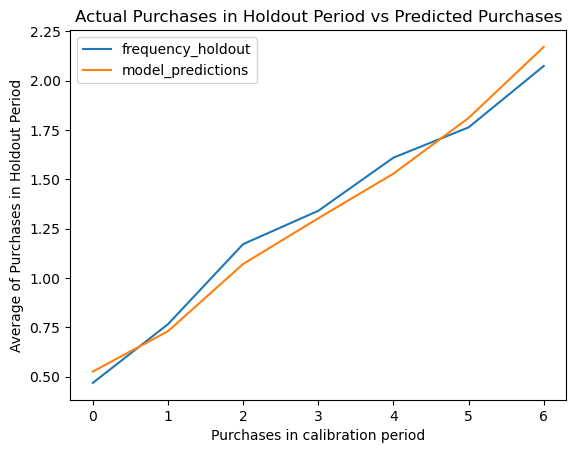

In [122]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases


plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

### As we can see our model does the decent job while predicting the purchase behaviour.

In [123]:
summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [124]:
#Creating a function which can predict the future purchased value based on the lookup window

def bgf_get_pred_error(t, id_):
    
    individual = summary_bgf[summary_bgf["Customer ID"] == id_]
    
    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])
    
    actual_val = individual["frequency"]/individual["recency"]*t
    
    error = actual_val - ind_pred
    
    print("Your Predicted Purchase: %s" % (ind_pred))
    print("Your Actual Purchase: %s" % (actual_val))
    print("Prediction Error: %s" % (error))

In [125]:
bgf_get_pred_error(15, 12348.0)


Your Predicted Purchase: 2    0.132161
dtype: float64
Your Actual Purchase: 2    0.165289
dtype: float64
Prediction Error: 2    0.033128
dtype: float64


In [126]:
id_1 = 14606.0
id_2 = 12347.0

In [127]:
days_since_birth = 365

In [130]:
sp_trans_1 = data_combine[data_combine["Customer ID"] == id_1]
sp_trans_2 = data_combine[data_combine["Customer ID"] == id_2]

<Axes: title={'center': 'History of P_alive'}, ylabel='P_alive'>

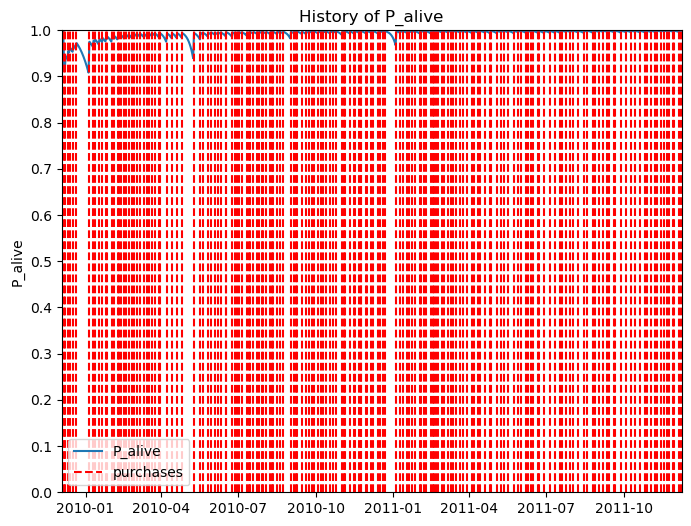

In [132]:
from lifetimes.plotting import plot_history_alive


plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_1, "InvoiceDate")

<Axes: title={'center': 'History of P_alive'}, ylabel='P_alive'>

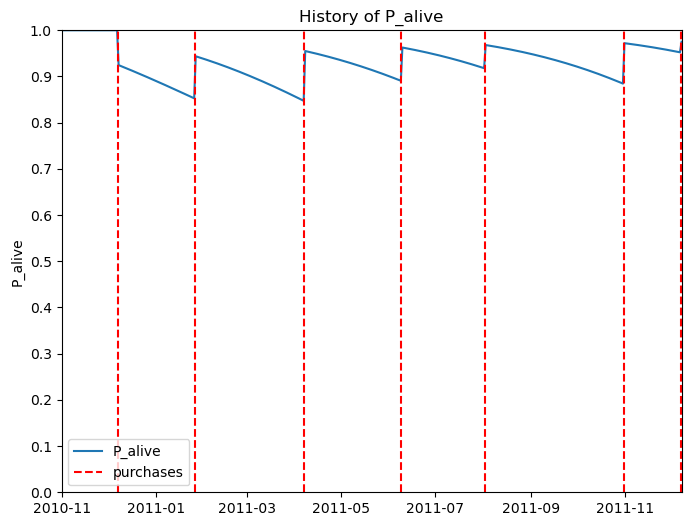

In [133]:
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_2, "InvoiceDate")

## As we can see in the above plot, after doing purchase on a certain time period, our customer will get's activated again.

In [134]:
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30

In [135]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30  
0             0.077362   0.750000  
1             0.495352   0.522388  
2             0.269178   0.330579  
3             0.172500   0.167364  
4             0.055446        NaN

In [136]:
summary_bgf = summary_bgf.fillna(value = 0) #filling null values with 0

In [137]:
#calculating the prediction error for the 30 days purchase prediction
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]

In [141]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])

In [142]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.337882659974867
Average Error:  0.41179765536782414
Root Mean Squared Error: 2.082758425736136


In [145]:
#Purchase Prediction

bgf_mse_purchase_30 = mean_squared_error(summary_bgf["actual_30"], summary_bgf["predicted_purchases"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase_30)
bgf_avg_error_purchase_30 = summary_bgf["Error"].mean()

### Note: This error is based on the 30 days lookup window, it may vary as you adjust the lookup window time.

In [146]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036  
2             0.269178   0.330579  0.061401  
3             0.172500   0.167364 -0.005136  
4             0.055446   0.000000 -0.055446

In [147]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = summary_bgf[summary_bgf["frequency"] > 0]

In [148]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

<Axes: >

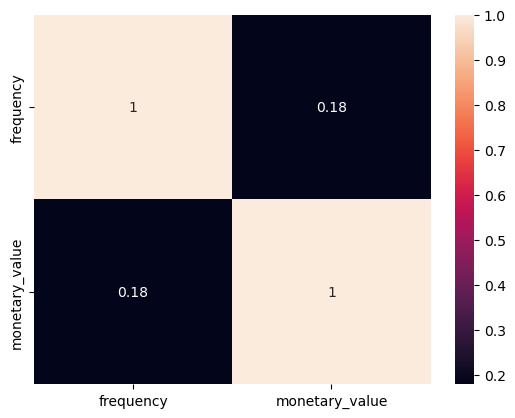

In [149]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

### To proceed with the Gamma Gamma Model we have to check for the assumption whether the frequency and monetary values are intercorrelated or not. As we can see here, the correlation between the frequency and monetary value is pretty low so we can go ahead to build Gamma Gamma Model.

In [150]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [151]:
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])


<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [152]:
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [153]:
summary_bgf.head(2)

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036

In [154]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]

In [155]:
summary_.shape

(4185, 8)

In [156]:
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"], 
                                                                        summary_["monetary_value"])


In [157]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  
1             0.495352   0.522388  0.027036          629.556290  
2             0.269178   0.330579  0.061401          409.972301  
3             0.172500   0.167364 -0.005136          842.513995  
6             0.566836   0.674157  0.107321          242.209404  
7             0.091934   0.147059  0.055125          254.858476

In [158]:
print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 340.18897558292656
Actual Average Sales: 330.6608495198251
Difference: -9.528126063101467
Mean Squared Error: 20896.881880786037
Root Mean Squared Error: 144.55753830494638


C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\3488999012.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Suchita\AppData\Local\Temp\ipykernel_15820\3488999012.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




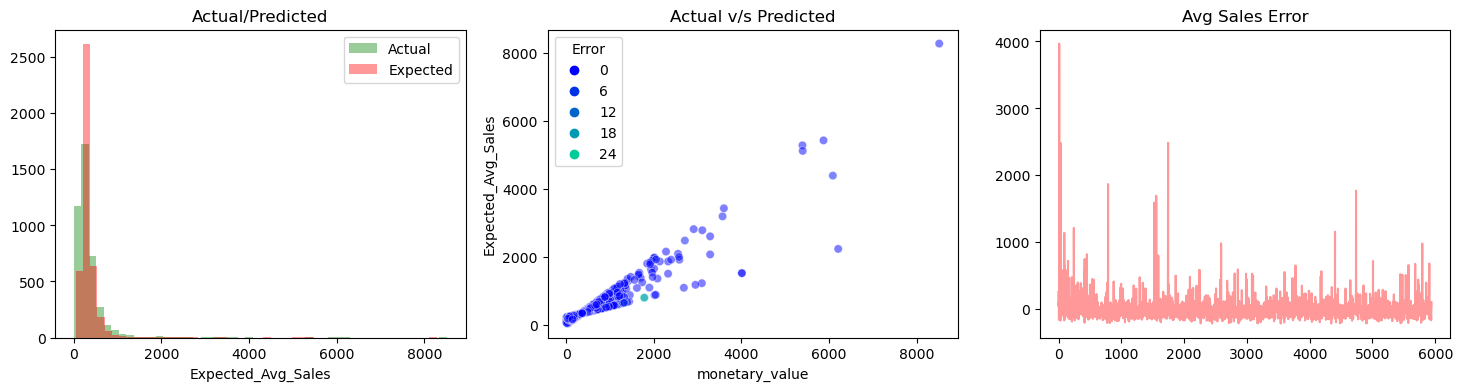

In [160]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_["monetary_value"], color = "g", kde = False)
sns.distplot(summary_["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
sns.scatterplot(x=summary_["monetary_value"], y=summary_["Expected_Avg_Sales"], alpha=0.5, hue=summary_["Error"], palette="winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_["monetary_value"]-summary_["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [161]:
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [162]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  predicted_clv  
1             0.495352   0.522388  0.027036          629.556290    7110.166375  
2             0.269178   0.330579  0.061401          409.972301    2512.081673  
3             0.172500   0.167364 -0.005136          842.513995    3449.798774  
6             0.566836   0.674157  0.107321          242.209404    3100.010138  
7             0.091934   0.147059  0.055125          254.858476     536.035114

In [163]:
#manual calculation of CLV
#summary_["predicted_purchases"] * summary_["Expected_Avg_Sales"]

In [164]:
#adding a 5% of profit margin
summary_["CLV"] = summary_["predicted_clv"]*0.05

In [165]:
summary_[summary_["Customer ID"] == 13902.0]


Customer ID  frequency  recency      T  monetary_value  \
1556      13902.0        5.0     99.0  731.0        6085.692   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1556             0.000758   1.515152  1.514393         4393.947298   

      predicted_clv       CLV  
1556      56.677321  2.833866

In [166]:
summary_.sort_values(by = "Error", ascending = False)

Customer ID  frequency  recency      T  monetary_value  \
5276      17622.0        2.0      2.0  598.0         194.145   
3448      15794.0        1.0      1.0  737.0         102.000   
2884      15230.0        1.0      1.0  240.0          59.400   
5045      17391.0        1.0      1.0  164.0         101.760   
2446      14792.0        1.0      1.0   64.0           6.200   
...           ...        ...      ...    ...             ...   
1677      14023.0        1.0    243.0  250.0         310.930   
4149      16495.0        1.0    273.0  276.0         437.900   
2174      14520.0        1.0    289.0  290.0         105.600   
4904      17250.0        1.0    258.0  261.0         221.870   
1058      13404.0        1.0    211.0  212.0          34.680   

      predicted_purchases  actual_30      Error  Expected_Avg_Sales  \
5276             0.003059  30.000000  29.996941          265.738713   
3448             0.008321  30.000000  29.991679          259.074204   
2884             0.076162  30.000000  29.923838          245.259590   
5045             0.132262  30.000000  29.867738          258.996375   
2446             0.342512  30.000000  29.657488          228.007537   
...                   ...        ...        ...                 ...   
1677             0.154797   0.123457  -0.031340          326.827426   
4149             0.142739   0.109890  -0.032849          368.002110   
2174             0.136983   0.103806  -0.033177          260.241636   
4904             0.149580   0.116279  -0.033301          297.946452   
1058             0.177494   0.142180  -0.035314          237.243222   

      predicted_clv        CLV  
5276      14.937363   0.746868  
3448      44.309988   2.215499  
2884     381.340230  19.067012  
5045     696.754608  34.837730  
2446    1549.261568  77.463078  
...             ...        ...  
1677    1139.053953  56.952698  
4149    1191.242796  59.562140  
2174     811.317591  40.565880  
4904    1006.736400  50.336820  
1058     937.220109  46.861005  

[4185 rows x 11 columns]

In [167]:
actual = summary_["monetary_value"]*summary_["actual_30"]

In [168]:
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]

In [169]:
error = actual - pred

In [170]:
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [171]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 108.19828103163462
Mean Squared Error: 907287.2534809974
Root Mean Squared Error: 952.5162746541381


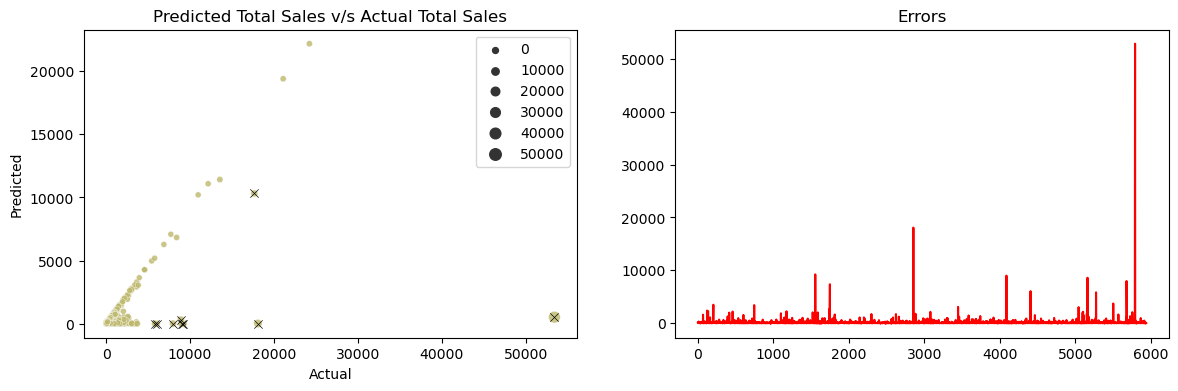

In [173]:
#Predicted v/s Actual
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.scatterplot(x=result["Actual"], y=result["Predicted"], size=result["Error"], color="darkkhaki", alpha=0.8, marker='o')
sns.scatterplot(x=result[result["Error"] > 5000]["Actual"], y=result[result["Error"] > 5000]["Predicted"], color="k", marker="x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result["Error"], color = "r")
plt.title("Errors")
plt.show()

# Pareto - Negative Binom Distribution + Gamma Gamma Distribution Model

In [174]:
summary_pnbd = summary.copy()

In [175]:
summary_pnbd.shape


(5942, 5)

In [177]:
from lifetimes import ParetoNBDFitter

pareto_nbd = ParetoNBDFitter(penalizer_coef = 0.0)
pareto_nbd.fit(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

<lifetimes.ParetoNBDFitter: fitted with 5942 subjects, alpha: 63.88, beta: 124.23, r: 0.83, s: 0.16>

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

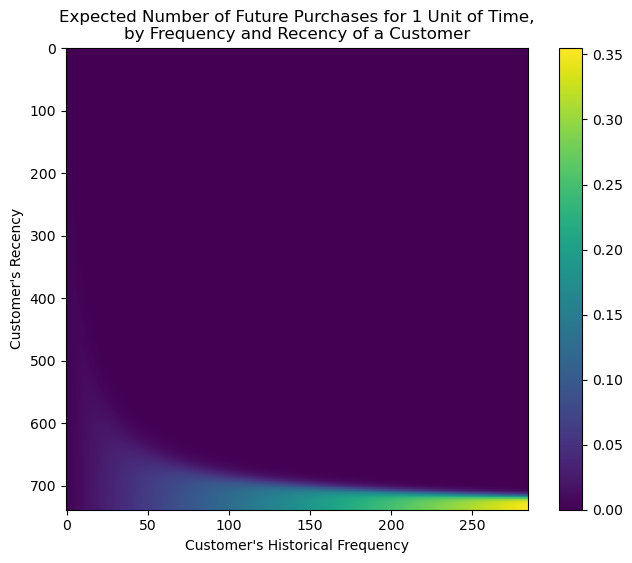

In [178]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(pareto_nbd)

C:\Users\Suchita\anaconda3\lib\site-packages\lifetimes\fitters\pareto_nbd_fitter.py:323: RuntimeWarning:

overflow encountered in exp



<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

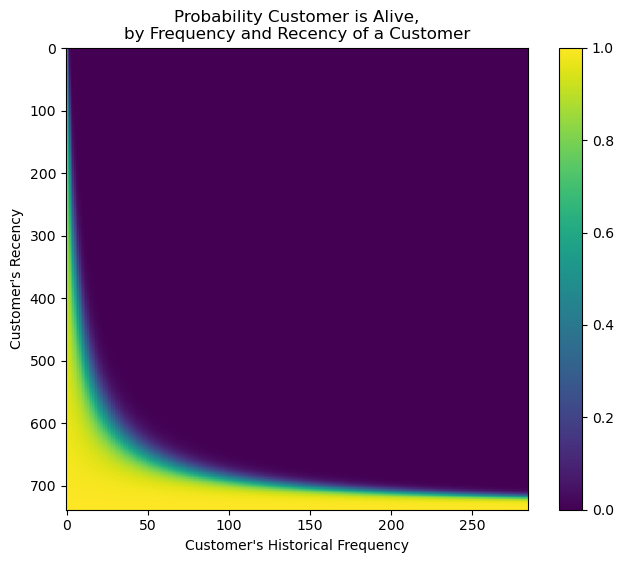

In [179]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(pareto_nbd)

In [180]:
summary_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])
summary_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [181]:
t = 30
summary_pnbd["predicted_purchases"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [182]:
summary_pnbd.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
2260      14606.0      181.0    735.0  736.0      165.079448     0.000215   
5495      17841.0      193.0    736.0  737.0      357.437461     0.000216   
2965      15311.0      201.0    738.0  738.0      560.647015     0.000000   
402       12748.0      206.0    735.0  735.0      241.501117     0.000000   
2565      14911.0      284.0    737.0  738.0      948.996127     0.000229   

       p_alive  predicted_purchases  
2260  0.999785             6.799060  
5495  0.999784             7.238721  
2965  1.000000             7.529732  
402   1.000000             7.745166  
2565  0.999771            10.623731

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

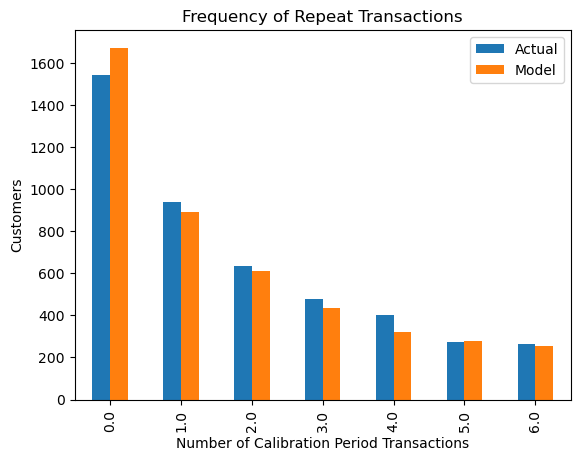

In [183]:
plot_period_transactions(pareto_nbd)

In [185]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data_combine, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [186]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [187]:
pareto_nbd.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.59, beta: 1493.02, r: 0.82, s: 1.31>

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

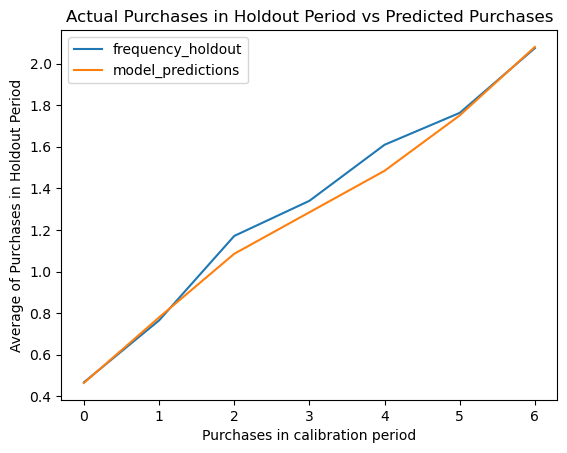

In [188]:
plot_calibration_purchases_vs_holdout_purchases(pareto_nbd, pareto_summary_cal_holdout)

In [189]:
#Creating a function which can predict the future purchased value based on the lookup window

def pareto_get_pred_error(t, id_):
    
    individual_p = summary_pnbd[summary_pnbd["Customer ID"] == id_]
    
    ind_pred_p = pareto_nbd.predict(t, individual_p["frequency"], individual_p["recency"], individual_p["T"])
    
    actual_val_p = individual_p["frequency"]/individual_p["recency"]*t
    
    error = actual_val_p - ind_pred_p
    
    print("Your Predicted Purchase: %s" % (ind_pred_p))
    print("Your Actual Purchase: %s" % (actual_val_p))
    print("Prediction Error: %s" % (error))

In [190]:
pareto_get_pred_error(30, 12346.0)

Your Predicted Purchase: 0    0.031903
dtype: float64
Your Actual Purchase: 0    0.75
dtype: float64
Prediction Error: 0    0.718097
dtype: float64


In [191]:
summary_pnbd["actual_30_p"] = summary_pnbd["frequency"]/summary_pnbd["recency"]*30

In [192]:
summary_pnbd["actual_30_p"].fillna(0, inplace = True)

In [193]:
summary_pnbd["p_error"] = summary_pnbd["actual_30_p"]-summary_pnbd["predicted_purchases"]

In [194]:
print("Mean Squared Error: %s" % mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])))
print("Average Purchase Error: %s" %(summary_pnbd["p_error"].mean()))

Mean Squared Error: 4.335937572864573
Root Mean Squared Error: 2.082291423615958
Average Purchase Error: 0.4123681688862142


In [195]:
pareto_mse_purchase = mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])
pareto_rmse_purchase = sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
pareto_avg_error_purchase = summary_pnbd["p_error"].mean()

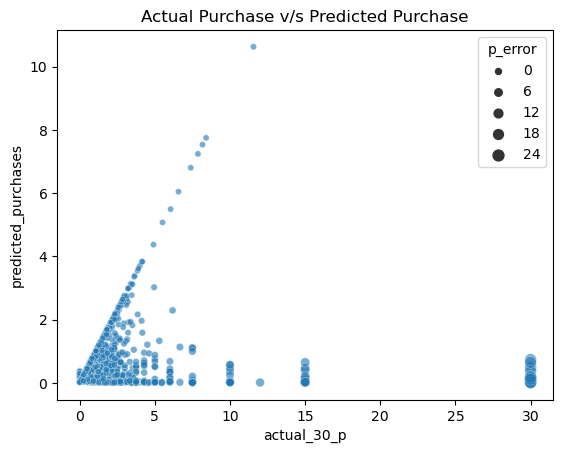

In [197]:
sns.scatterplot(data=summary_pnbd, x="actual_30_p", y="predicted_purchases", size="p_error", alpha=0.6)
plt.title("Actual Purchase v/s Predicted Purchase")
plt.show()

In [200]:
#Get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, data_, id_):
    
    individual_alive = data_combine[data_combine["Customer ID"] == id_]
    plot_history_alive(pareto_nbd, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")

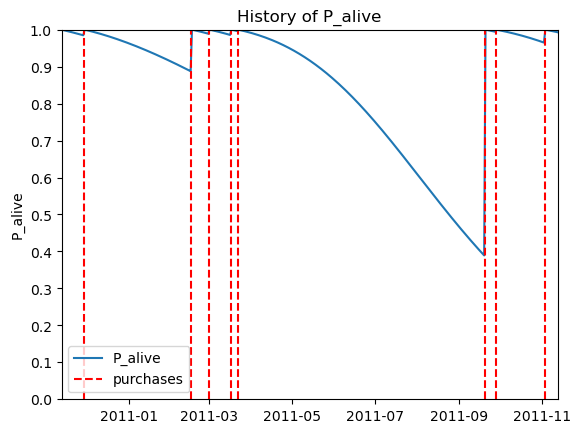

In [201]:
get_history_alive(365, data, 12352.0)

In [202]:
summary_copy = summary_pnbd.copy()

In [203]:
summary_copy = summary_copy[(summary_copy["frequency"] > 0) & (summary_copy["monetary_value"] > 0)]

<Axes: >

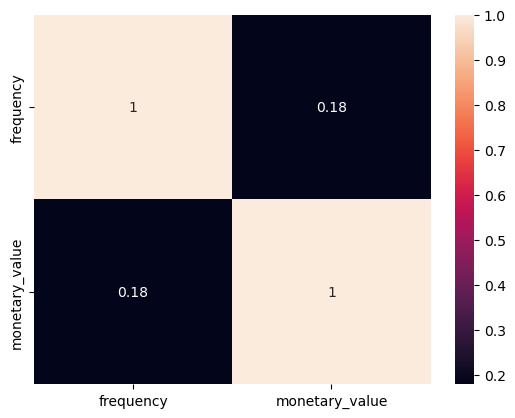

In [204]:
sns.heatmap(summary_copy[["frequency", "monetary_value"]].corr(), annot = True)

In [205]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [206]:
ggf_p.fit(summary_copy["frequency"], summary_copy["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [207]:
ggf_p.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [208]:
summary_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(summary_copy["frequency"],
                                                                        summary_copy["monetary_value"])


In [209]:
summary_copy.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034901   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003675   
6      12352.0        8.0    356.0  392.0      218.182500     0.017284   
7      12353.0        1.0    204.0  408.0       89.000000     0.126957   

    p_alive  predicted_purchases  actual_30_p   p_error  expected_avg_sales_p  
1  0.999366             0.499740     0.522388  0.022648            629.556290  
2  0.965099             0.277711     0.330579  0.052868            409.972301  
3  0.996325             0.180376     0.167364 -0.013012            842.513995  
6  0.982716             0.568664     0.674157  0.105493            242.209404  
7  0.873043             0.101372     0.147059  0.045687            254.858476

In [210]:
avg_purchase_error = summary_copy["monetary_value"].mean() - summary_copy["expected_avg_sales_p"].mean()

In [211]:
print("Acutal Avg Sales: %s" % summary_copy["monetary_value"].mean())
print("Predicted Avg Sales: %s" % summary_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

Acutal Avg Sales: 330.6608495198251
Predicted Avg Sales: 340.18897558292656
Mean Sqaured Error: 20896.881880786037
Root Mean Sqaured Error: 144.55753830494638
Avg Sales Error: -9.528126063101467


In [212]:
actual = summary_copy["actual_30_p"] * summary_copy["monetary_value"]
predicted = summary_copy["predicted_purchases"] * summary_copy["expected_avg_sales_p"]

In [213]:
error = actual-predicted

In [214]:
result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T

In [215]:
print("Average Error: %s" % result_p["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result_p["Actual"], result_p["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result_p["Actual"], result_p["Predicted"])))

Average Error: 108.16538856147056
Mean Squared Error: 911083.1577371092
Root Mean Squared Error: 954.5067614936571


In [218]:
summary_copy["predicted_clv_p"] = ggf_p.customer_lifetime_value(pareto_nbd,
                                                       summary_copy["frequency"],
                                                       summary_copy["recency"],
                                                       summary_copy["T"],
                                                       summary_copy["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

C:\Users\Suchita\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [219]:
summary_copy.shape

(4185, 12)

In [220]:
summary_copy["CLV_p"] = summary_copy["predicted_clv_p"]*0.05

In [221]:
summary_copy.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034901   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003675   
6      12352.0        8.0    356.0  392.0      218.182500     0.017284   
7      12353.0        1.0    204.0  408.0       89.000000     0.126957   

    p_alive  predicted_purchases  actual_30_p   p_error  expected_avg_sales_p  \
1  0.999366             0.499740     0.522388  0.022648            629.556290   
2  0.965099             0.277711     0.330579  0.052868            409.972301   
3  0.996325             0.180376     0.167364 -0.013012            842.513995   
6  0.982716             0.568664     0.674157  0.105493            242.209404   
7  0.873043             0.101372     0.147059  0.045687            254.858476   

   predicted_clv_p       CLV_p  
1      6362.024416  318.101221  
2      2215.505798  110.775290  
3      3141.257492  157.062875  
6      2731.406152  136.570308  
7       468.174408   23.408720

# Modified Beta Geom + Gamma Gamma Distribution Model

In [222]:
summary_mbg = summary.copy()

In [223]:
summary_mbg.head()

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571
2      12348.0        4.0    363.0  438.0      449.310000
3      12349.0        4.0    717.0  735.0     1107.172500
4      12350.0        0.0      0.0  310.0        0.000000

In [225]:
from lifetimes import ModifiedBetaGeoFitter

mbg = ModifiedBetaGeoFitter(penalizer_coef = 0.0)
mbg.fit(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 5942 subjects, a: 0.18, alpha: 57.90, b: 2.05, r: 0.84>

In [226]:
mbg.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.837666  0.029295         0.780247         0.895084
alpha  57.895342  1.972543        54.029159        61.761525
a       0.180562  0.015152         0.150864         0.210260
b       2.045383  0.314244         1.429466         2.661301

C:\Users\Suchita\anaconda3\lib\site-packages\lifetimes\fitters\modified_beta_geo_fitter.py:184: RuntimeWarning:

overflow encountered in double_scalars



<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

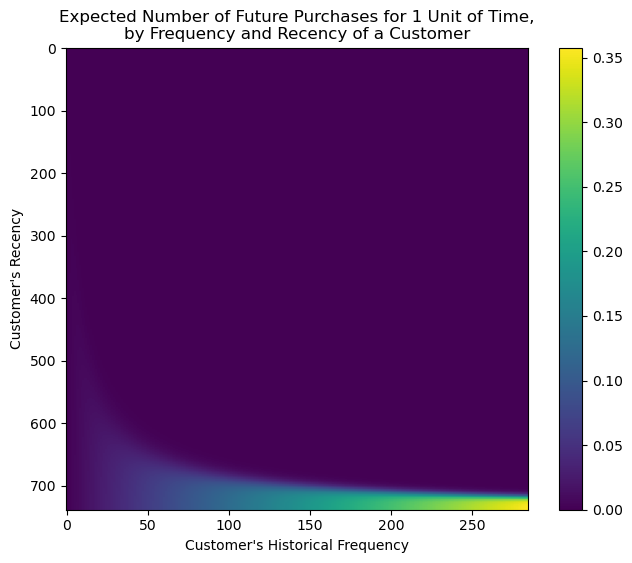

In [227]:

plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(mbg)

C:\Users\Suchita\anaconda3\lib\site-packages\lifetimes\fitters\modified_beta_geo_fitter.py:213: RuntimeWarning:

overflow encountered in power



<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

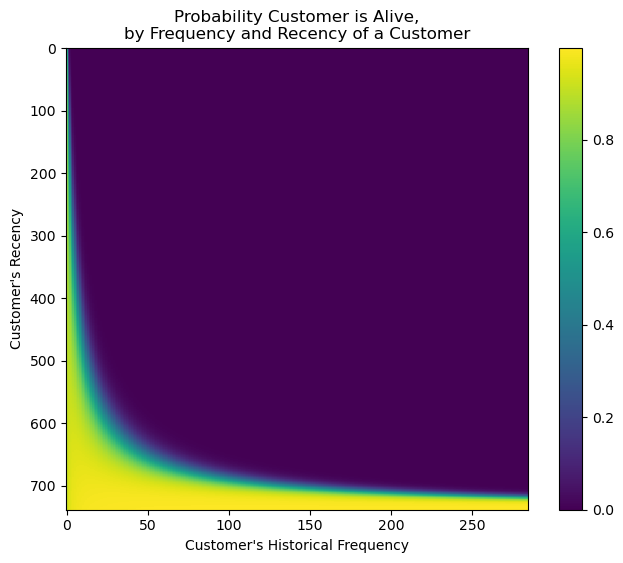

In [228]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(mbg)

In [230]:
t = 30
summary_mbg["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

In [231]:
summary_mbg

Customer ID  frequency  recency      T  monetary_value  \
0         12346.0       10.0    400.0  725.0      -15.468000   
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
4         12350.0        0.0      0.0  310.0        0.000000   
...           ...        ...      ...    ...             ...   
5937      18283.0       18.0    655.0  658.0      146.405556   
5938      18284.0        1.0      2.0  431.0      -25.000000   
5939      18285.0        0.0      0.0  660.0        0.000000   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  
0                0.056541  
1                0.491299  
2                0.263606  
3                0.170685  
4                0.055882  
...                   ...  
5937             0.778669  
5938             0.023597  
5939             0.028394  
5940             0.058435  
5941             0.243185  

[5942 rows x 6 columns]

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

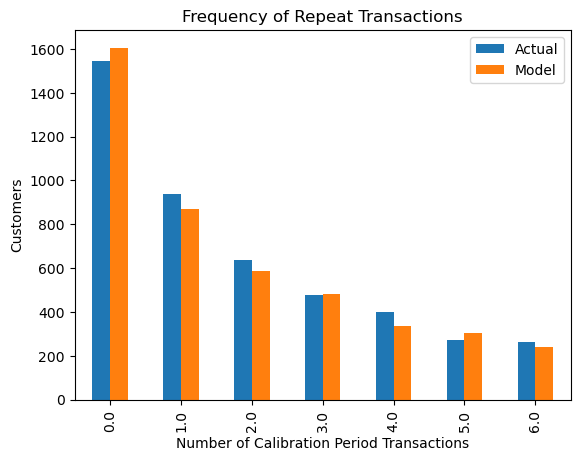

In [232]:
plot_period_transactions(mbg)

In [234]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data_combine, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [235]:
mbg.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 5025 subjects, a: 0.28, alpha: 56.91, b: 3.00, r: 0.84>

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

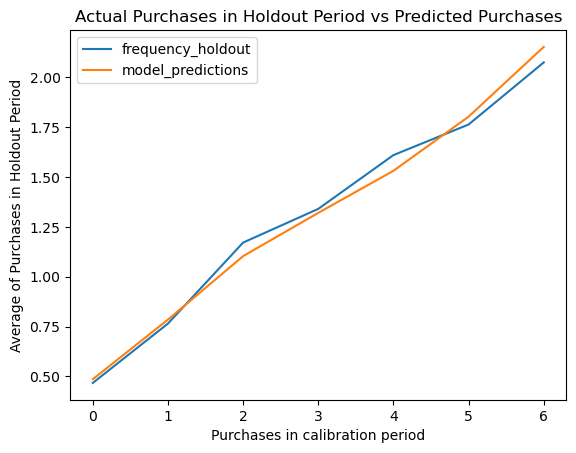

In [236]:
plot_calibration_purchases_vs_holdout_purchases(mbg, summary_cal_holdout)

In [237]:
summary_mbg["actual_30"] = summary_mbg["frequency"]/summary_mbg["recency"]*30

In [238]:
summary_mbg = summary_mbg.fillna(value = 0)

In [239]:
summary_mbg.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30  
0             0.056541   0.750000  
1             0.491299   0.522388  
2             0.263606   0.330579  
3             0.170685   0.167364  
4             0.055882   0.000000

In [240]:
summary_mbg["Error"] = summary_mbg["actual_30"] - summary_mbg["predicted_purchases"]

In [241]:
mse = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])

In [242]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_mbg["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.346082724386108
Average Error:  0.41709029134495434
Root Mean Squared Error: 2.0847260549976605


In [243]:
mbg_mse_purchase = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])
mbg_rmse_purchase = sqrt(mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"]))
mbg_avg_purchase_error = (summary_mbg["actual_30"].mean() - summary_mbg["predicted_purchases"].mean())

In [244]:
res_summary = summary_mbg[summary_mbg["frequency"] > 0]

In [245]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

<Axes: >

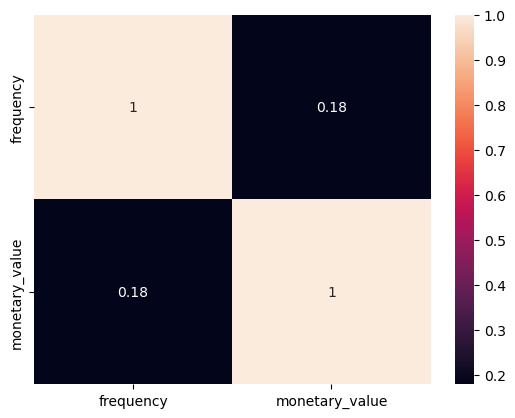

In [246]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

In [247]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [248]:
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [249]:
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [250]:
summary_mbg_new = summary_mbg[(summary_mbg["monetary_value"] > 0) & (summary_mbg["frequency"] > 0)]

In [251]:
summary_mbg_new

Customer ID  frequency  recency      T  monetary_value  \
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
6         12352.0        8.0    356.0  392.0      218.182500   
7         12353.0        1.0    204.0  408.0       89.000000   
...           ...        ...      ...    ...             ...   
5935      18281.0        1.0    397.0  577.0       80.820000   
5936      18282.0        2.0    119.0  126.0       38.195000   
5937      18283.0       18.0    655.0  658.0      146.405556   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  actual_30     Error  
1                0.491299   0.522388  0.031089  
2                0.263606   0.330579  0.066973  
3                0.170685   0.167364 -0.003321  
6                0.558628   0.674157  0.115529  
7                0.089547   0.147059  0.057512  
...                   ...        ...       ...  
5935             0.069791   0.075567  0.005776  
5936             0.422312   0.504202  0.081890  
5937             0.778669   0.824427  0.045759  
5940             0.058435   0.242915  0.184480  
5941             0.243185   0.258621  0.015436  

[4185 rows x 8 columns]

In [252]:
summary_mbg_new["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_mbg_new["frequency"], 
                                                                        summary_mbg_new["monetary_value"])

In [253]:
summary_mbg_new.head()


Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  
1             0.491299   0.522388  0.031089          629.556290  
2             0.263606   0.330579  0.066973          409.972301  
3             0.170685   0.167364 -0.003321          842.513995  
6             0.558628   0.674157  0.115529          242.209404  
7             0.089547   0.147059  0.057512          254.858476

In [254]:
print("Expected Average Sales: %s" % summary_mbg_new["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_mbg_new["monetary_value"].mean())
print("Difference: %s" % (summary_mbg_new["monetary_value"].mean() - summary_mbg_new["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"])))

Expected Average Sales: 340.18897558292656
Actual Average Sales: 330.6608495198251
Difference: -9.528126063101467
Mean Squared Error: 20896.881880786037
Root Mean Squared Error: 144.55753830494638


In [256]:
summary_mbg_new["predicted_clv"] = ggf.customer_lifetime_value(mbg,
                                                       summary_mbg_new["frequency"],
                                                       summary_mbg_new["recency"],
                                                       summary_mbg_new["T"],
                                                       summary_mbg_new["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [257]:
summary_mbg_new

Customer ID  frequency  recency      T  monetary_value  \
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
6         12352.0        8.0    356.0  392.0      218.182500   
7         12353.0        1.0    204.0  408.0       89.000000   
...           ...        ...      ...    ...             ...   
5935      18281.0        1.0    397.0  577.0       80.820000   
5936      18282.0        2.0    119.0  126.0       38.195000   
5937      18283.0       18.0    655.0  658.0      146.405556   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1                0.491299   0.522388  0.031089          629.556290   
2                0.263606   0.330579  0.066973          409.972301   
3                0.170685   0.167364 -0.003321          842.513995   
6                0.558628   0.674157  0.115529          242.209404   
7                0.089547   0.147059  0.057512          254.858476   
...                   ...        ...       ...                 ...   
5935             0.069791   0.075567  0.005776          252.205811   
5936             0.422312   0.504202  0.081890          189.361729   
5937             0.778669   0.824427  0.045759          165.915956   
5940             0.058435   0.242915  0.184480          348.308624   
5941             0.243185   0.258621  0.015436          603.671615   

      predicted_clv  
1       7003.290033  
2       2522.287420  
3       3504.589499  
6       3031.895454  
7        585.402211  
...             ...  
5935     462.472507  
5936    1721.587682  
5937    2985.789802  
5940     502.273040  
5941    3515.355099  

[4185 rows x 10 columns]

In [258]:
summary_mbg_new["CLV"] = summary_mbg_new["predicted_clv"]*0.05

In [259]:
actual = summary_["monetary_value"]*summary_["actual_30"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [260]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % (mean_squared_error(result["Actual"], result["Predicted"])))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 108.19828103163462
Mean Squared Error: 907287.2534809974
Root Mean Squared Error: 952.5162746541381


In [261]:
summary_mbg_new

Customer ID  frequency  recency      T  monetary_value  \
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
6         12352.0        8.0    356.0  392.0      218.182500   
7         12353.0        1.0    204.0  408.0       89.000000   
...           ...        ...      ...    ...             ...   
5935      18281.0        1.0    397.0  577.0       80.820000   
5936      18282.0        2.0    119.0  126.0       38.195000   
5937      18283.0       18.0    655.0  658.0      146.405556   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1                0.491299   0.522388  0.031089          629.556290   
2                0.263606   0.330579  0.066973          409.972301   
3                0.170685   0.167364 -0.003321          842.513995   
6                0.558628   0.674157  0.115529          242.209404   
7                0.089547   0.147059  0.057512          254.858476   
...                   ...        ...       ...                 ...   
5935             0.069791   0.075567  0.005776          252.205811   
5936             0.422312   0.504202  0.081890          189.361729   
5937             0.778669   0.824427  0.045759          165.915956   
5940             0.058435   0.242915  0.184480          348.308624   
5941             0.243185   0.258621  0.015436          603.671615   

      predicted_clv         CLV  
1       7003.290033  350.164502  
2       2522.287420  126.114371  
3       3504.589499  175.229475  
6       3031.895454  151.594773  
7        585.402211   29.270111  
...             ...         ...  
5935     462.472507   23.123625  
5936    1721.587682   86.079384  
5937    2985.789802  149.289490  
5940     502.273040   25.113652  
5941    3515.355099  175.767755  

[4185 rows x 11 columns]

In [262]:
predicted_clv_results = pd.DataFrame(summary_[["Customer ID", "predicted_clv"]])


In [263]:
predicted_clv_results = predicted_clv_results.merge(summary_copy[["Customer ID", "predicted_clv_p"]], on = "Customer ID")


In [264]:
predicted_clv_results = predicted_clv_results.merge(summary_mbg_new[["Customer ID", "predicted_clv"]], on = "Customer ID")


In [265]:
predicted_clv_results.columns = ["Customer ID", "BG-NBD", "Pareto-NBD", "MBG-NBD"]

In [266]:
predicted_clv_results.head(5)

Customer ID       BG-NBD   Pareto-NBD      MBG-NBD
0      12347.0  7110.166375  6362.024416  7003.290033
1      12348.0  2512.081673  2215.505798  2522.287420
2      12349.0  3449.798774  3141.257492  3504.589499
3      12352.0  3100.010138  2731.406152  3031.895454
4      12353.0   536.035114   468.174408   585.402211

# Purchase Prediction Result Summary

In [267]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]


In [268]:
data = [[bgf_mse_purchase_30, pareto_mse_purchase, mbg_mse_purchase],
[bgf_rmse_purchase_30, pareto_rmse_purchase, mbg_rmse_purchase], [bgf_avg_error_purchase_30, pareto_avg_error_purchase, mbg_avg_purchase_error]]

In [269]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)


In [270]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)

In [271]:
model_purchase_result

BG-NBD  Pareto-NBD   MBG-NBD
MSE Purchase Error   4.337883    4.335938  4.346083
RMSE Purchase Error  2.082758    2.082291  2.084726
Avg Purchase Error   0.411798    0.412368  0.417090

# As we can see here is that there is no much difference when it comes to the performance of these models but Pareto NBD model is slightly performing better when it comes it minimizing the MSE & RMSE Errors.

# CUSTOMER SEGMENTATION USING PREDICTED CLV

In [284]:
summary_mbg_new.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1             0.491299   0.522388  0.031089          629.556290   
2             0.263606   0.330579  0.066973          409.972301   
3             0.170685   0.167364 -0.003321          842.513995   
6             0.558628   0.674157  0.115529          242.209404   
7             0.089547   0.147059  0.057512          254.858476   

   predicted_clv         CLV  
1    7003.290033  350.164502  
2    2522.287420  126.114371  
3    3504.589499  175.229475  
6    3031.895454  151.594773  
7     585.402211   29.270111

In [287]:
col = ["predicted_purchases", "predicted_clv"]

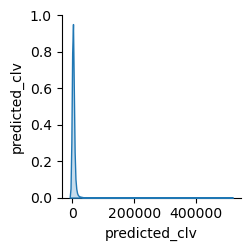

In [283]:
# Ensure the correct column names are used
sns.pairplot(summary_mbg_new[[ 'predicted_clv']], diag_kind="kde")

In [288]:
new_df = summary_mbg_new[col]

In [290]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [291]:
inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)

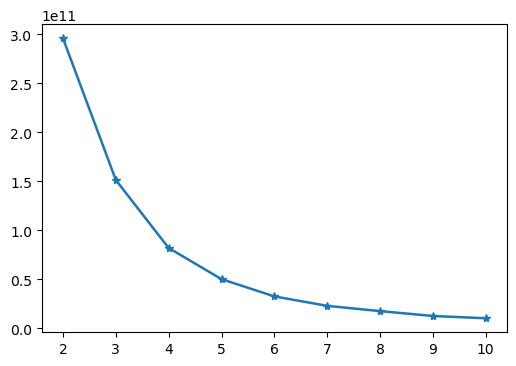

In [292]:

plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [294]:
k_model = KMeans(n_clusters=4, 
                 init="k-means++", 
                 max_iter=1000, 
                 random_state=42)

In [295]:
k_model.fit(new_df)


KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [296]:
new_df

predicted_purchases  predicted_clv
1                0.491299    7003.290033
2                0.263606    2522.287420
3                0.170685    3504.589499
6                0.558628    3031.895454
7                0.089547     585.402211
...                   ...            ...
5935             0.069791     462.472507
5936             0.422312    1721.587682
5937             0.778669    2985.789802
5940             0.058435     502.273040
5941             0.243185    3515.355099

[4185 rows x 2 columns]

In [298]:
centers = k_model.cluster_centers_

In [299]:
centers

array([[3.54730386e-01, 2.59293045e+03],
       [3.67340997e+00, 1.80230439e+05],
       [3.16719221e+00, 4.77843428e+05],
       [2.53945981e+00, 4.09177907e+04]])

In [301]:
labels = k_model.labels_

In [305]:
import pickle
import joblib


# Saving our model - Pareto/NBD
joblib.dump(pareto_nbd, 'pareto_nbd.pkl')

# Saving our 2nd model - MBG Model
joblib.dump(mbg, 'gamma_model.pkl')

['gamma_model.pkl']